<a href="https://colab.research.google.com/github/SatriaImawan12/Customer-Segmentation-and-Profiling-by-Modified-LRFM-Analysis-using-CLARA-Algorithm-/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Loading Dataset**

Data yang digunakan adalah data penjualan yang merekam transaksi penjualan dari sebuah aplikasi yang melayani berbagai jenis pembelian produk, seperti elektronik, keperluan rumah tangga, dan lain sebagainya.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

## **1.1 Transaction Table**

In [ ]:
list_trx_path = ['/content/drive/MyDrive/Colab Notebooks/Dataset 1/trx/33_processed.csv',
                 '/content/drive/MyDrive/Colab Notebooks/Dataset 1/trx/11_processed.csv',
                 '/content/drive/MyDrive/Colab Notebooks/Dataset 1/trx/12_processed.csv',
                 '/content/drive/MyDrive/Colab Notebooks/Dataset 1/trx/91_processed.csv']

import re

# List kosong untuk menyimpan nilai yang diekstrak
list_nama_trx = []

# Loop untuk mengekstrak nilai dari setiap path file dan menyimpannya dalam list_nama_trx
for path in list_trx_path:
    nilai = re.search(r'/trx/(\d+)_processed\.csv', path).group(1)  # Menggunakan regex untuk mengekstrak nilai
    list_nama_trx.append(nilai)

# Tampilkan info tiap file trx
for path, nama in zip(list_trx_path, list_nama_trx):
    df = pd.read_csv(path)
    print(f"\n Info dataframe df_trx_{nama}:")
    df.info()


 Info dataframe df_trx_33:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103793 entries, 0 to 2103792
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 96.3+ MB

 Info dataframe df_trx_11:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253808 entries, 0 to 253807
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                253808 non-null  object 
 1   user_id           253808 non-null  object 
 2   product_id        253808 non-null  int64  
 3   gross_amount      252410 non-null  float64
 4   discounts         60610 non-null   float64
 5   transaction_date  253808 non-null  object 
dtypes: float64(2), int64(1

In [ ]:
# Menggabungkan semua data trx menjadi satu df
df_trx = pd.read_csv(list_trx_path[0])

for path in list_trx_path[1:]:
    df_trx_end = pd.read_csv(path)
    df_trx = pd.concat([df_trx, df_trx_end], axis=0, ignore_index=True)

# Tampilkn info
df_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778163 entries, 0 to 2778162
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 127.2+ MB


Transaction dataframe has 6 columns and 2778163 rows.

**Columns Detail**

* `id`: Id transaksi (Identifier pada df_trx)
* `user_id`: Id pengguna
* `product_id`: Id produk
* `gross_amount`: Nilai transaksi sebelum diskon (Rp)
* `discounts`: Potongan harga yang diperoleh (Rp)
* `transactions_date`: Tanggal transaksi terjadi

In [ ]:
df_trx.isna().sum()

id                        0
user_id                   0
product_id                0
gross_amount          15980
discounts           1940220
transaction_date          0
dtype: int64

## **1.2 User Table**

In [ ]:
# Lokasi tabel disimpan
user_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 1/user.csv'

# Load data
df_user = pd.read_csv(user_path)

# Tampilkan info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427486 entries, 0 to 427485
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              427486 non-null  object 
 1   full_name       427486 non-null  object 
 2   gender          427486 non-null  object 
 3   money_spent     427484 non-null  float64
 4   refund          427484 non-null  float64
 5   wallet_balance  427484 non-null  float64
 6   join_date       427486 non-null  object 
 7   birth           427486 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.1+ MB


User dataframe has 8 columns and 427486 rows.

**Columns Detail**

* `id`: Id pengguna (Identifier pada df_user)
* `full_name`: Nama lengkap pengguna
* `gender`: Jenis kelamin pengguna
* `money_spent`: Total uang yang telah dihabiskan pengguna untuk bertransaksi (Rp)
* `refund`: Total pengembalian uang oleh pengguna (Rp)
* `wallet_balance`: Total saldo tersisa di akun pengguna (Rp)
* `join_date`: Tanggal bergabung menjadi pengguna
* `birth`: Tanggal lahir pengguna

## **1.3 Product Table**

In [ ]:
# Path to file
product_path ='/content/drive/MyDrive/Colab Notebooks/Dataset 1/product_reference.csv'

# 5 first rows
with open(product_path, 'r') as file:
    print("".join([next(file) for i in range(5)]))

﻿id;product name
1;Man Fashion
2;Woman Fashion
3;Food & Drink
4;Ride Hailing



In [ ]:
df_product = pd.read_csv(product_path, sep=';')

# Show information
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18 non-null     int64 
 1   product name  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


Product dataframe has 2 columns and 18 rows.

**Columns Detail**

* `id`: Id produk (Identifier pada df_product)
* `product_name`: Nama produk (lebih tepatnya kategori produk)

## **1.4 Location Table**

In [ ]:
# Path to file
location_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 1/location_reference.csv'
df_location = pd.read_csv(location_path)

# Show information
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama provinsi   7407 non-null   object
 1   kode provinsi   7407 non-null   int64 
 2   nama kabupaten  7407 non-null   object
 3   kode kabupaten  7407 non-null   object
 4   nama kecamatan  7407 non-null   object
 5   kode kecamatan  7407 non-null   object
dtypes: int64(1), object(5)
memory usage: 347.3+ KB


**Columns Detail**

* `nama_provinsi`: Nama provinsi
* `kode_provinsi`: Id provinsi
* `nama_kabupaten`: Nama kabupaten
* `kode_kabupaten`: Id kabupaten
* `nama_kecamatan`: Nama kecamatan
* `kode_kecamatan`: Id kecamatan (sekaligus sebagai identifier pada df_location)

In [ ]:
# Show 5 first rows
df_location.head()

nama provinsi  kode provinsi nama kabupaten kode kabupaten  \
0     GORONTALO             75        BOALEMO           7502   
1     GORONTALO             75        BOALEMO           7502   
2     GORONTALO             75        BOALEMO           7502   
3     GORONTALO             75        BOALEMO           7502   
4     GORONTALO             75        BOALEMO           7502   

     nama kecamatan kode kecamatan  
0         BOTUMOITO         750206  
1            DULUPI         750203  
2          MANANGGU         750205  
3         PAGUYAMAN         750201  
4  PAGUYAMAN PANTAI         750207

In [ ]:
# Load df_location with 'kode provinsi' = 11, 12, 33, 91
df_location[df_location['kode provinsi'].isin([11, 12, 33, 91])].drop_duplicates('kode provinsi', keep='first')

nama provinsi  kode provinsi nama kabupaten kode kabupaten  \
1653       P A P U A             91    BIAK NUMFOR           9106   
2926            ACEH             11     ACEH BARAT           1105   
5710     JAWA TENGAH             33   BANJARNEGARA           3304   
6952  SUMATERA UTARA             12         ASAHAN           1209   

        nama kecamatan kode kecamatan  
1653   AIMANDO PADAIDO         910619  
2926  ARONGAN LAMBALEK         110507  
5710       BANJARMANGU         330409  
6952        AEK KUASAN         120918

# **2. Data Merging**

Data merging dilakukan dengan menggabungkan tabel transaksi dan tabel user. Dua tabel ini dipertahankan setelah dijoin karena analisis akan difokuskan pada tabel transaksi dan kami ingin memastikan data user tidak hilang. Penanganan data user yang tidak pernah bertransaksi akan dilakukan pada tahap selanjutnya.

## **2.1 Membuat kode untuk penghubung tabel user dengan location**

In [ ]:
# Membuat kolom 6 digit pertama user_id pada df_user untuk penghubung ke df_location
df_user['first_six_digit'] = df_user['id'].str[2:8]
df_user.head()

id               full_name     gender  money_spent    refund  \
0  SC7502062007001          PRIYANTI FIORI  perempuan    2270000.0  130000.0   
1  SC7502062007002  KURNIA MUHAMAD WANIMBO  laki-laki    2370000.0  140000.0   
2  SC7502062007003           AJENG LESTARI  perempuan          0.0       0.0   
3  SC7502062007004         TIA IRIANI S.E.  perempuan          0.0       0.0   
4  SC7502062006001                    ANCE  perempuan          0.0       0.0   

   wallet_balance   join_date       birth first_six_digit  
0        480000.0  2023-11-05  1984-07-25          750206  
1        500000.0  2023-12-27  1991-02-12          750206  
2             0.0  2024-07-19  1982-06-18          750206  
3             0.0  2024-05-24  1972-09-27          750206  
4             0.0  2024-11-25  1992-06-11          750206

## **2.2 Membuat tabel user khusus untuk user dari provinsi Jawa Tengah, Sumatera Utara, Aceh, dan Papua**

In [ ]:
# Left join df_user dengan df_location berdasarkan first_six_digit dan kode kecamatan
df_user_loc = pd.merge(df_user, df_location, left_on='first_six_digit', right_on='kode kecamatan', how='left')
df_user_loc.head()

id               full_name     gender  money_spent    refund  \
0  SC7502062007001          PRIYANTI FIORI  perempuan    2270000.0  130000.0   
1  SC7502062007002  KURNIA MUHAMAD WANIMBO  laki-laki    2370000.0  140000.0   
2  SC7502062007003           AJENG LESTARI  perempuan          0.0       0.0   
3  SC7502062007004         TIA IRIANI S.E.  perempuan          0.0       0.0   
4  SC7502062006001                    ANCE  perempuan          0.0       0.0   

   wallet_balance   join_date       birth first_six_digit nama provinsi  \
0        480000.0  2023-11-05  1984-07-25          750206     GORONTALO   
1        500000.0  2023-12-27  1991-02-12          750206     GORONTALO   
2             0.0  2024-07-19  1982-06-18          750206     GORONTALO   
3             0.0  2024-05-24  1972-09-27          750206     GORONTALO   
4             0.0  2024-11-25  1992-06-11          750206     GORONTALO   

   kode provinsi nama kabupaten kode kabupaten nama kecamatan kode kecamatan  
0             75        BOALEMO           7502      BOTUMOITO         750206  
1             75        BOALEMO           7502      BOTUMOITO         750206  
2             75        BOALEMO           7502      BOTUMOITO         750206  
3             75        BOALEMO           7502      BOTUMOITO         750206  
4             75        BOALEMO           7502      BOTUMOITO         750206

In [ ]:
# Dataframe untuk data pengguna dari provinsi dengan kode 33, 12, 11, dan 91
df_user_4prov = df_user_loc[df_user_loc['kode provinsi'].isin([33, 12, 11, 91])]
df_user_4prov.head()

id               full_name     gender  money_spent  \
80613  SC9106192006001          Hj. INAYAT ADE  perempuan     620000.0   
80614  SC9106082021001  WELEM AULIA S.H., M.H.  laki-laki    2180000.0   
80615  SC9106082002001             DHARMAYANDA  laki-laki    1650000.0   
80616  SC9106012015002               IDA MUTIA  perempuan    1930000.0   
80617  SC9106012011001                  NURLIA  perempuan    1910000.0   

        refund  wallet_balance   join_date       birth first_six_digit  \
80613  20000.0       -230000.0  2023-10-28  1977-01-02          910619   
80614  60000.0        800000.0  2023-11-09  2000-09-09          910608   
80615  20000.0        950000.0  2023-11-02  1997-05-21          910608   
80616  20000.0       1010000.0  2023-12-19  1982-09-09          910601   
80617  80000.0        940000.0  2023-11-10  2005-09-14          910601   

      nama provinsi  kode provinsi nama kabupaten kode kabupaten  \
80613     P A P U A             91    BIAK NUMFOR           9106   
80614     P A P U A             91    BIAK NUMFOR           9106   
80615     P A P U A             91    BIAK NUMFOR           9106   
80616     P A P U A             91    BIAK NUMFOR           9106   
80617     P A P U A             91    BIAK NUMFOR           9106   

        nama kecamatan kode kecamatan  
80613  AIMANDO PADAIDO         910619  
80614       BIAK BARAT         910608  
80615       BIAK BARAT         910608  
80616        BIAK KOTA         910601  
80617        BIAK KOTA         910601

In [ ]:
# Memeriksa jumlah unik pengguna dalam tabel df_master
total_user = df_user_4prov['id'].nunique()

# Menampilkan hasil
print("Jumlah pengguna: ", total_user)

Jumlah pengguna:  98499


## **3. Membuat df_master yang berisi seluruh data user, transaksi, lokasi, serta produk yang dibelinya**

In [ ]:
# Full outer join antara df_trx dan df_user_4prov berdasarkan user_id dan id
df_master = pd.merge(df_trx, df_user_4prov,
                     left_on='user_id', right_on='id',
                     how='outer',
                     suffixes=('_trx', '_user'))

# Left join df_master dengan df_product berdasarkan product_id dan id
df_master = pd.merge(df_master, df_product,
                     left_on='product_id', right_on='id',
                     how='left')

# Menampilkan df_master
df_master.head()

id_trx          user_id  product_id  gross_amount  discounts  \
0  TRX679679  SC3304092002002         1.0       24500.0        NaN   
1  TRX679680  SC3304092002002         1.0       68800.0        NaN   
2  TRX679681  SC3304092002002         1.0       26700.0    26700.0   
3  TRX679682  SC3304092002002         2.0       27100.0        NaN   
4  TRX679683  SC3304092002002         2.0       78300.0        NaN   

  transaction_date          id_user full_name     gender  money_spent  \
0       2024-11-08  SC3304092002002     TUTIK  perempuan    1690000.0   
1       2024-04-11  SC3304092002002     TUTIK  perempuan    1690000.0   
2       2024-07-01  SC3304092002002     TUTIK  perempuan    1690000.0   
3       2024-02-07  SC3304092002002     TUTIK  perempuan    1690000.0   
4       2024-03-12  SC3304092002002     TUTIK  perempuan    1690000.0   

     refund  wallet_balance   join_date       birth first_six_digit  \
0  310000.0        710000.0  2023-11-26  1986-02-01          330409   
1  310000.0        710000.0  2023-11-26  1986-02-01          330409   
2  310000.0        710000.0  2023-11-26  1986-02-01          330409   
3  310000.0        710000.0  2023-11-26  1986-02-01          330409   
4  310000.0        710000.0  2023-11-26  1986-02-01          330409   

  nama provinsi  kode provinsi nama kabupaten kode kabupaten nama kecamatan  \
0   JAWA TENGAH             33   BANJARNEGARA           3304    BANJARMANGU   
1   JAWA TENGAH             33   BANJARNEGARA           3304    BANJARMANGU   
2   JAWA TENGAH             33   BANJARNEGARA           3304    BANJARMANGU   
3   JAWA TENGAH             33   BANJARNEGARA           3304    BANJARMANGU   
4   JAWA TENGAH             33   BANJARNEGARA           3304    BANJARMANGU   

  kode kecamatan   id   product name  
0         330409  1.0    Man Fashion  
1         330409  1.0    Man Fashion  
2         330409  1.0    Man Fashion  
3         330409  2.0  Woman Fashion  
4         330409  2.0  Woman Fashion

In [ ]:
# Memeriksa jumlah unik pengguna dalam tabel df_master
total_users = df_master['id_user'].nunique()

# Menampilkan hasil
print("Jumlah pengguna: ", total_users)

Jumlah pengguna:  98499


In [ ]:
# Menghapus kolom duplikat
df_master = df_master.drop(columns=['user_id', 'first_six_digit', 'id'])
df_master.head()

id_trx  product_id  gross_amount  discounts transaction_date  \
0  TRX679679         1.0       24500.0        NaN       2024-11-08   
1  TRX679680         1.0       68800.0        NaN       2024-04-11   
2  TRX679681         1.0       26700.0    26700.0       2024-07-01   
3  TRX679682         2.0       27100.0        NaN       2024-02-07   
4  TRX679683         2.0       78300.0        NaN       2024-03-12   

           id_user full_name     gender  money_spent    refund  \
0  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
1  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
2  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
3  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
4  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   

   wallet_balance   join_date       birth nama provinsi  kode provinsi  \
0        710000.0  2023-11-26  1986-02-01   JAWA TENGAH             33   
1        710000.0  2023-11-26  1986-02-01   JAWA TENGAH             33   
2        710000.0  2023-11-26  1986-02-01   JAWA TENGAH             33   
3        710000.0  2023-11-26  1986-02-01   JAWA TENGAH             33   
4        710000.0  2023-11-26  1986-02-01   JAWA TENGAH             33   

  nama kabupaten kode kabupaten nama kecamatan kode kecamatan   product name  
0   BANJARNEGARA           3304    BANJARMANGU         330409    Man Fashion  
1   BANJARNEGARA           3304    BANJARMANGU         330409    Man Fashion  
2   BANJARNEGARA           3304    BANJARMANGU         330409    Man Fashion  
3   BANJARNEGARA           3304    BANJARMANGU         330409  Woman Fashion  
4   BANJARNEGARA           3304    BANJARMANGU         330409  Woman Fashion

In [ ]:
# Memeriksa jumlah transaksi yang benar-benar terjadi (id_trx tidak NaN) dalam df_master
total_trx = len(df_master[df_master['id_trx'].isna()==False])

# Menampilkan hasil
print("Jumlah transaksi yang benar-benar terjadi: ", total_trx)

Jumlah transaksi yang benar-benar terjadi:  2778163


In [ ]:
# Memeriksa jumlah transaksi yang tidak benar-benar terjadi (id_trx bernilai NaN) dalam df_master
total_trx_notreal = len(df_master[df_master['id_trx'].isna()])

# Menampilkan hasil
print("Jumlah transaksi yang tidak benar-benar terjadi: ", total_trx_notreal)

Jumlah transaksi yang tidak benar-benar terjadi:  8350


# **3. Informasi pada Dataset**

In [ ]:
# Get information from df master
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786513 entries, 0 to 2786512
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id_trx            object 
 1   product_id        float64
 2   gross_amount      float64
 3   discounts         float64
 4   transaction_date  object 
 5   id_user           object 
 6   full_name         object 
 7   gender            object 
 8   money_spent       float64
 9   refund            float64
 10  wallet_balance    float64
 11  join_date         object 
 12  birth             object 
 13  nama provinsi     object 
 14  kode provinsi     int64  
 15  nama kabupaten    object 
 16  kode kabupaten    object 
 17  nama kecamatan    object 
 18  kode kecamatan    object 
 19  product name      object 
dtypes: float64(6), int64(1), object(13)
memory usage: 425.2+ MB


The master data consists of 20 columns and 2786513  rows.

# **4. Data Formatting**

## **4.1 Standarisasi Nama Kolom**

Nama kolom yang standar pada database adalah :      
* Menggunakan lowercase (huruf kecil)
* Tidak ada spasi (hanya huruf - angka - underscore)
* Mengganti nama kolom dengan nama yang lebih deksriptif (jelas)

Sehingga perlu untuk mengubah nama kolom pada dataset

In [ ]:
# Ubah spasi menjadi underscore
df_master.columns = df_master.columns.str.replace(' ', '_')

# Perbaikan nama kolom
df_master = df_master.rename(columns={'id_trx':'trx_id', 'id_user':'user_id'})

In [ ]:
# Inspect ulang
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786513 entries, 0 to 2786512
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   trx_id            object 
 1   product_id        float64
 2   gross_amount      float64
 3   discounts         float64
 4   transaction_date  object 
 5   user_id           object 
 6   full_name         object 
 7   gender            object 
 8   money_spent       float64
 9   refund            float64
 10  wallet_balance    float64
 11  join_date         object 
 12  birth             object 
 13  nama_provinsi     object 
 14  kode_provinsi     int64  
 15  nama_kabupaten    object 
 16  kode_kabupaten    object 
 17  nama_kecamatan    object 
 18  kode_kecamatan    object 
 19  product_name      object 
dtypes: float64(6), int64(1), object(13)
memory usage: 425.2+ MB


In [ ]:
# Perbaikan nilai 'P A P U A' menjadi 'PAPUA'
df_master.loc[df_master['nama_provinsi'] == 'P A P U A', 'nama_provinsi'] = 'PAPUA'

In [ ]:
# Inspeksi ulang
df_master['nama_provinsi'].unique()

array(['JAWA TENGAH', 'ACEH', 'SUMATERA UTARA', 'PAPUA'], dtype=object)

## **4.2 Konversi Tipe Data**

In [ ]:
# Menyesuaikan tipe data
df_master['product_id'] = df_master['product_id'].astype('Int64')
df_master['product_id'] = df_master['product_id'].apply(lambda x: str(x) if not pd.isnull(x) else x)
df_master['transaction_date'] = pd.to_datetime(df_master['transaction_date'])
df_master['birth'] = pd.to_datetime(df_master['birth'])
df_master['join_date'] = pd.to_datetime(df_master['join_date'])
df_master['kode_provinsi'] = df_master['kode_provinsi'].astype(str)

# Tampilkan hasil
df_master.dtypes

trx_id                      object
product_id                  object
gross_amount               float64
discounts                  float64
transaction_date    datetime64[ns]
user_id                     object
full_name                   object
gender                      object
money_spent                float64
refund                     float64
wallet_balance             float64
join_date           datetime64[ns]
birth               datetime64[ns]
nama_provinsi               object
kode_provinsi               object
nama_kabupaten              object
kode_kabupaten              object
nama_kecamatan              object
kode_kecamatan              object
product_name                object
dtype: object

In [ ]:
# Membuat kondisi untuk memeriksa apakah discounts > gross_amount
condition = df_master['discounts'] > df_master['gross_amount']

# Mengubah nilai discounts yang lebih besar menjadi sama dengan nilai gross_amount
df_master.loc[condition, 'discounts'] = df_master.loc[condition, 'gross_amount']

# Memeriksa apakah masih ada baris dengan discounts > gross_amount setelah perubahan
inspect = df_master[df_master['discounts'] > df_master['gross_amount']]

if not inspect.empty:
    print("Masih ada baris yang memiliki discounts > gross_amount setelah perubahan.")
    print(inspect)
else:
    print("Tidak ada baris yang memiliki discounts > gross_amount setelah perubahan.")

Tidak ada baris yang memiliki discounts > gross_amount setelah perubahan.


# **5. Data Cleaning**

## **5.1 Missing Value**

In [ ]:
# Checking missing value
df_master.isnull().sum()

trx_id                 8350
product_id             8350
gross_amount          24330
discounts           1948570
transaction_date       8350
user_id                   0
full_name                 0
gender                    0
money_spent               0
refund                    0
wallet_balance            0
join_date                 0
birth                     0
nama_provinsi             0
kode_provinsi             0
nama_kabupaten            0
kode_kabupaten            0
nama_kecamatan            0
kode_kecamatan            0
product_name           8350
dtype: int64

Perlu diketahui bahwa sebelum penggabungan tabel dilakukan, tidak terdapat nilai NaN kecuali pada kolom `gross_amount` dan `discounts` (dapat diperiska pada bagian 1.1 Transaction Table). Maka 8.350 nilai NaN yang teridentifikasi merupakan data dari user yang tidak memiliki riwayat transaksi.

In [ ]:
# Hitung jumlah baris dengan NaN pada kolom 'trx_id'
num_nan_trx_id = df_master['trx_id'].isna().sum()

# Cetak jumlah baris dengan NaN pada kolom lain
for col in df_master.columns:
    if df_master[col].isna().sum() == num_nan_trx_id:
        print(f"Jumlah baris dengan NaN pada kolom '{col}': {df_master[col].isna().sum()}")

Jumlah baris dengan NaN pada kolom 'trx_id': 8350
Jumlah baris dengan NaN pada kolom 'product_id': 8350
Jumlah baris dengan NaN pada kolom 'transaction_date': 8350
Jumlah baris dengan NaN pada kolom 'product_name': 8350


### **Kolom `gross_amount`**

Menangani nilai NaN untuk user yang tidak memiliki riwayat transaksi terlebih dahulu.

In [ ]:
# Isi nilai NaN pada kolom 'gross_amount' dengan 0 jika 'trx_id' juga NaN
df_master.loc[df_master['trx_id'].isna(), 'gross_amount'] = 0

In [ ]:
# Memeriksa sisa nilai NaN pada kolom `gross_amount`
df_master['gross_amount'].isna().sum()

15980

Jumlah nilai yang benar-benar hilang pada kolom `gross_amount` relatif rendah (0,57% dari keseluruhan data), maka penghapusan baris data yang mengandung nilai yang hilang dapat diterima.

Selain itu, tidak memungkinkan apabila dilakukan pengidentifikasian terhadap penyebab adanya *missing value* pada kolom ini, karena nilai yang terkandung sangat besar kemungkinannya berasal dari kumulatif beberapa item produk di kategori produk yang sama.

In [ ]:
# Handling missing value pada kolom 'gross_amount'
df_master = df_master.dropna(subset=['gross_amount'])

### **Kolom `discounts`**

Menangani nilai NaN untuk user yang tidak memiliki riwayat terlebih dahulu.

In [ ]:
# Isi nilai NaN pada kolom 'discounts' dengan 0 jika 'trx_id' juga NaN
df_master.loc[df_master['trx_id'].isna(), 'discounts'] = 0

In [ ]:
# Memeriksa sisa nilai NaN pada kolom `gross_amount`
df_master['discounts'].isna().sum()

1924240

Jumlah nilai yang hilang pada kolom `discounts` relatif besar, mencapai 69,83% dari keseluruhan data. Maka langkah yang tepat untuk menangani *missing value* pada kolom ini tentu bukan dengan menghapus baris-baris data yang mengandung *missing value*, tetapi akan dilakukan beberapa identifikasi terlebih dulu.

**Identifikasi Penyebab Missing Value**

1. Apakah terdapat pola pada nilai diskon berdasarkan kategori produk tertentu?

Buat kolom `discount_percentage` yaitu persentase diskon dari setiap transaksi.

In [ ]:
# Membuat kolom baru "discount_percentage"
df_master.loc[:,'discount_percentage'] = df_master['discounts'] / df_master['gross_amount'] * 100

df_master.head()

trx_id product_id  gross_amount  discounts transaction_date  \
0  TRX679679          1       24500.0        NaN       2024-11-08   
1  TRX679680          1       68800.0        NaN       2024-04-11   
2  TRX679681          1       26700.0    26700.0       2024-07-01   
3  TRX679682          2       27100.0        NaN       2024-02-07   
4  TRX679683          2       78300.0        NaN       2024-03-12   

           user_id full_name     gender  money_spent    refund  \
0  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
1  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
2  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
3  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   
4  SC3304092002002     TUTIK  perempuan    1690000.0  310000.0   

   wallet_balance  join_date      birth nama_provinsi kode_provinsi  \
0        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   
1        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   
2        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   
3        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   
4        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   

  nama_kabupaten kode_kabupaten nama_kecamatan kode_kecamatan   product_name  \
0   BANJARNEGARA           3304    BANJARMANGU         330409    Man Fashion   
1   BANJARNEGARA           3304    BANJARMANGU         330409    Man Fashion   
2   BANJARNEGARA           3304    BANJARMANGU         330409    Man Fashion   
3   BANJARNEGARA           3304    BANJARMANGU         330409  Woman Fashion   
4   BANJARNEGARA           3304    BANJARMANGU         330409  Woman Fashion   

   discount_percentage  
0                  NaN  
1                  NaN  
2                100.0  
3                  NaN  
4                  NaN

Memeriksa apakah terdapat pola nilai dalam kolom diskon.

In [ ]:
# Menampilkan transaksi berdasarkan 'product_id'
filtered = df_master.loc[(df_master['product_id'] == '12') & (df_master['discounts'].notna())]

display(filtered.head())

trx_id product_id  gross_amount  discounts transaction_date  \
22  TRX679701         12       25500.0    22200.0       2024-11-10   
23  TRX679702         12       34200.0     7800.0       2024-11-13   
59  TRX679738         12       13100.0     3700.0       2024-09-12   
60  TRX679739         12       38100.0     6300.0       2024-06-16   
92  TRX679771         12         200.0      200.0       2024-10-27   

            user_id      full_name     gender  money_spent    refund  \
22  SC3304092002002          TUTIK  perempuan    1690000.0  310000.0   
23  SC3304092002002          TUTIK  perempuan    1690000.0  310000.0   
59  SC3304092002003  LUCIA SUMARNA  perempuan    2170000.0  430000.0   
60  SC3304092002003  LUCIA SUMARNA  perempuan    2170000.0  430000.0   
92  SC3304092002004      FATHULLAH  perempuan    1640000.0  210000.0   

    wallet_balance  join_date      birth nama_provinsi kode_provinsi  \
22        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   
23        710000.0 2023-11-26 1986-02-01   JAWA TENGAH            33   
59        800000.0 2023-12-07 1989-05-22   JAWA TENGAH            33   
60        800000.0 2023-12-07 1989-05-22   JAWA TENGAH            33   
92        510000.0 2023-12-21 1988-06-03   JAWA TENGAH            33   

   nama_kabupaten kode_kabupaten nama_kecamatan kode_kecamatan product_name  \
22   BANJARNEGARA           3304    BANJARMANGU         330409     Otomotif   
23   BANJARNEGARA           3304    BANJARMANGU         330409     Otomotif   
59   BANJARNEGARA           3304    BANJARMANGU         330409     Otomotif   
60   BANJARNEGARA           3304    BANJARMANGU         330409     Otomotif   
92   BANJARNEGARA           3304    BANJARMANGU         330409     Otomotif   

    discount_percentage  
22            87.058824  
23            22.807018  
59            28.244275  
60            16.535433  
92           100.000000

Diambil satu contoh kategori produk untuk melihat apakah terdapat pola tertentu pada nilai diskon, dan dapat disimpulkan bahwa tidak terdapat pola pada nilai diskon berdasarkan kategori produk tertentu.

2. Apakah terdapat transaksi yang benar-benar terjadi dengan nilai diskon 0 (nol)? Jika tidak, besar kemungkinan nilai NaN pada kolom diskon merupakan nilai yang mewakili transaksi yang tidak mendapatkan diskon.

In [ ]:
# Menampilkan transaksi yang benar-benar terjadi dengan diskon 0
filtered = df_master.loc[(df_master['trx_id'].isna() == False) & (df_master['discounts'] == 0)]

display(filtered)

Empty DataFrame
Columns: [trx_id, product_id, gross_amount, discounts, transaction_date, user_id, full_name, gender, money_spent, refund, wallet_balance, join_date, birth, nama_provinsi, kode_provinsi, nama_kabupaten, kode_kabupaten, nama_kecamatan, kode_kecamatan, product_name, discount_percentage]
Index: []

Berdasarkan hasil pemeriksaan di atas, dapat disimpulkan bahwa memang benar nilai NaN pada kolom diskon merupakan nilai yang mewakili transaksi yang tidak mendapatkan diskon. Sehingga langkah untuk mengatasi *missing value* pada kolom diskon adalah dengan mengisi nilai NaN dengan 0 (nol).

In [ ]:
# Handling missing value pada kolom 'discounts'
df_master.loc[:,'discounts'] = df_master['discounts'].fillna(0)

In [ ]:
# Menghapus kolom 'discount_percentage'
df_master = df_master.drop(columns=['discount_percentage'])

# Check missing value
df_master.isnull().sum()

trx_id              8350
product_id          8350
gross_amount           0
discounts              0
transaction_date    8350
user_id                0
full_name              0
gender                 0
money_spent            0
refund                 0
wallet_balance         0
join_date              0
birth                  0
nama_provinsi          0
kode_provinsi          0
nama_kabupaten         0
kode_kabupaten         0
nama_kecamatan         0
kode_kecamatan         0
product_name        8350
dtype: int64

## **5.2 Duplicated Data**

In [ ]:
# Check duplicated data
jumlah_duplikat_total = df_master.duplicated().sum()

print("Jumlah baris duplikat pada semua kolom alias baris yang sama persis:", jumlah_duplikat_total)

Jumlah baris duplikat pada semua kolom alias baris yang sama persis: 0


Tidak terdapat baris yang terduplikat sehingga tidak perlu dilakukan penanganan apapun.

## **5.3 Invalid Data**

#### 1. Memeriksa apakah terdapat pelanggan yang pernah melakukan transaksi sebelum mendaftar sebagai user dalam aplikasi

In [ ]:
# Memeriksa baris dengan transaction_date yang lebih awal daripada join_date
user = df_master[df_master['transaction_date'] < df_master['join_date']]

display(user)

trx_id product_id  gross_amount  discounts transaction_date  \
3580     TRX683259          1        9900.0     9900.0       2024-01-12   
3584     TRX683263          2       47900.0    47900.0       2024-03-21   
3589     TRX683268          4      197200.0    40000.0       2024-03-08   
3593     TRX683272          5         300.0      300.0       2024-02-06   
3597     TRX683276         11        5700.0        0.0       2024-03-01   
...            ...        ...           ...        ...              ...   
2777044  TRX565613         12        3000.0        0.0       2024-03-18   
2777046  TRX565615         12       13800.0        0.0       2024-08-14   
2777048  TRX565617         14       23000.0        0.0       2024-07-08   
2777049  TRX565618         16        4200.0        0.0       2024-06-01   
2777050  TRX565619         16        5800.0        0.0       2024-09-13   

                 user_id       full_name     gender  money_spent  refund  \
3580     SC3304061001010  RASNA MARGIATI  perempuan          0.0     0.0   
3584     SC3304061001010  RASNA MARGIATI  perempuan          0.0     0.0   
3589     SC3304061001010  RASNA MARGIATI  perempuan          0.0     0.0   
3593     SC3304061001010  RASNA MARGIATI  perempuan          0.0     0.0   
3597     SC3304061001010  RASNA MARGIATI  perempuan          0.0     0.0   
...                  ...             ...        ...          ...     ...   
2777044  SC9115152007001  M.R. NASRULLAH  laki-laki          0.0     0.0   
2777046  SC9115152007001  M.R. NASRULLAH  laki-laki          0.0     0.0   
2777048  SC9115152007001  M.R. NASRULLAH  laki-laki          0.0     0.0   
2777049  SC9115152007001  M.R. NASRULLAH  laki-laki          0.0     0.0   
2777050  SC9115152007001  M.R. NASRULLAH  laki-laki          0.0     0.0   

         wallet_balance  join_date      birth nama_provinsi kode_provinsi  \
3580          2390000.0 2024-04-26 1989-04-20   JAWA TENGAH            33   
3584          2390000.0 2024-04-26 1989-04-20   JAWA TENGAH            33   
3589          2390000.0 2024-04-26 1989-04-20   JAWA TENGAH            33   
3593          2390000.0 2024-04-26 1989-04-20   JAWA TENGAH            33   
3597          2390000.0 2024-04-26 1989-04-20   JAWA TENGAH            33   
...                 ...        ...        ...           ...           ...   
2777044        830000.0 2024-10-26 2007-11-03         PAPUA            91   
2777046        830000.0 2024-10-26 2007-11-03         PAPUA            91   
2777048        830000.0 2024-10-26 2007-11-03         PAPUA            91   
2777049        830000.0 2024-10-26 2007-11-03         PAPUA            91   
2777050        830000.0 2024-10-26 2007-11-03         PAPUA            91   

        nama_kabupaten kode_kabupaten nama_kecamatan kode_kecamatan  \
3580      BANJARNEGARA           3304   BANJARNEGARA         330406   
3584      BANJARNEGARA           3304   BANJARNEGARA         330406   
3589      BANJARNEGARA           3304   BANJARNEGARA         330406   
3593      BANJARNEGARA           3304   BANJARNEGARA         330406   
3597      BANJARNEGARA           3304   BANJARNEGARA         330406   
...                ...            ...            ...            ...   
2777044        WAROPEN           9115   SOYOI MAMBAI         911515   
2777046        WAROPEN           9115   SOYOI MAMBAI         911515   
2777048        WAROPEN           9115   SOYOI MAMBAI         911515   
2777049        WAROPEN           9115   SOYOI MAMBAI         911515   
2777050        WAROPEN           9115   SOYOI MAMBAI         911515   

                   product_name  
3580                Man Fashion  
3584              Woman Fashion  
3589               Ride Hailing  
3593     Keperluan Rumah Tangga  
3597                Top Up Game  
...                         ...  
2777044                Otomotif  
2777046                Otomotif  
2777048               Kesehatan  
2777049        Sewa Motor/Mobil  
2777050        Sewa Motor/Mobil  

[4991 rows 

Terdapat 4991 baris data yang menunjukkan kasus di mana seorang pelanggan telah melakukan transaksi sebelumnya, namun belum melakukan proses pendaftaran sebagai pengguna (user) dalam aplikasi. Kondisi ini dapat memengaruhi konsistensi dan integritas data, serta dapat menyebabkan kesulitan dalam analisis. Oleh karena itu, langkah yang diambil untuk menangani situasi ini adalah dengan **menghapus baris-baris data** yang terkait dari dataset.

In [ ]:
# Menghapus baris data invalid
df_master = df_master.drop(df_master[df_master['transaction_date'] < df_master['join_date']].index)

# Mereset index DataFrame
df_master.reset_index(drop=True, inplace=True)

display(df_master)

trx_id product_id  gross_amount  discounts transaction_date  \
0        TRX679679          1       24500.0        0.0       2024-11-08   
1        TRX679680          1       68800.0        0.0       2024-04-11   
2        TRX679681          1       26700.0    26700.0       2024-07-01   
3        TRX679682          2       27100.0        0.0       2024-02-07   
4        TRX679683          2       78300.0        0.0       2024-03-12   
...            ...        ...           ...        ...              ...   
2765537        NaN        NaN           0.0        0.0              NaT   
2765538        NaN        NaN           0.0        0.0              NaT   
2765539        NaN        NaN           0.0        0.0              NaT   
2765540        NaN        NaN           0.0        0.0              NaT   
2765541        NaN        NaN           0.0        0.0              NaT   

                 user_id                 full_name     gender  money_spent  \
0        SC3304092002002                     TUTIK  perempuan    1690000.0   
1        SC3304092002002                     TUTIK  perempuan    1690000.0   
2        SC3304092002002                     TUTIK  perempuan    1690000.0   
3        SC3304092002002                     TUTIK  perempuan    1690000.0   
4        SC3304092002002                     TUTIK  perempuan    1690000.0   
...                  ...                       ...        ...          ...   
2765537  SC1212202003002  WIBISONO DEFI S.H., M.H.  perempuan    1770000.0   
2765538  SC1212192004002    SAKA FRANS ROMAYA S.H.  laki-laki    1950000.0   
2765539  SC1212032006002          HAYANI BUNGAWALI  perempuan    1590000.0   
2765540  SC1212222006002          FIRNANDO ARIBAWA  laki-laki    1790000.0   
2765541  SC1212102017001    SARI NOVITA S.E., M.M.  perempuan    1430000.0   

           refund  wallet_balance  join_date      birth   nama_provinsi  \
0        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
1        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
2        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
3        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
4        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
...           ...             ...        ...        ...             ...   
2765537   40000.0        480000.0 2023-11-29 1983-10-12  SUMATERA UTARA   
2765538   70000.0        860000.0 2023-12-10 2003-09-07  SUMATERA UTARA   
2765539   40000.0        350000.0 2023-10-02 1977-04-27  SUMATERA UTARA   
2765540   40000.0        480000.0 2023-11-25 1996-01-01  SUMATERA UTARA   
2765541   30000.0        420000.0 2023-12-09 2004-02-10  SUMATERA UTARA   

        kode_provinsi nama_kabupaten kode_kabupaten     nama_kecamatan  \
0                  33   BANJARNEGARA           3304        BANJARMANGU   
1                  33   BANJARNEGARA           3304        BANJARMANGU   
2                  33   BANJARNEGARA           3304        BANJARMANGU   
3                  33   BANJARNEGARA           3304        BANJARMANGU   
4                  33   BANJARNEGARA           3304        BANJARMANGU   
...               ...            ...            ...                ...   
2765537            12           TOBA           1212  SIANTAR NARUMONDA   
2765538            12           TOBA           1212           SIGUMPAR   
2765539            12           TOBA           1212             SILAEN   
2765540            12           TOBA           1212           TAMPAHAN   
2765541            12           TOBA           1212              ULUAN   

        kode_kecamatan   product_name  
0               330409    Man Fashion  
1               330409    Man Fashion  
2               330409    Man Fashion  
3               330409  Woman Fashion  
4               330409  Woman Fashion  
...                ...            ...  
2765537         121220            NaN  
2765538         121219            NaN  
2765539         121203  

#### 2. Memeriksa data yang invalid melalui perhitungan statistik deskriptif

In [ ]:
# Seleski Kolom numerik
kolom = ['gross_amount', 'discounts','money_spent', 'refund','wallet_balance']
number_data = df_master[kolom]

# Perhitungan statistik deskriptif
statistics = pd.DataFrame({
    'mean': number_data.mean().round(2),
    'median': number_data.median(),
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1': number_data.quantile(0.25),
    'q2': number_data.quantile(0.50),
    'q3': number_data.quantile(0.75),
    'stdev': number_data.std().round(2)
})

# Tampilkan hasil
display(statistics.T)

gross_amount   discounts  money_spent        refund  wallet_balance
mean        56637.57     8975.65   1789159.56  5.792502e+05       607810.47
median      20700.00        0.00   1820000.00  1.700000e+05       590000.00
modus        3200.00        0.00   1870000.00  2.000000e+04       590000.00
min          -100.00     -100.00         0.00 -1.650000e+07    -15870000.00
max       2761300.00  1571300.00  18740000.00  2.727112e+10     11150000.00
q1           6300.00        0.00   1570000.00  1.000000e+05       440000.00
q2          20700.00        0.00   1820000.00  1.700000e+05       590000.00
q3          64200.00     5900.00   2040000.00  2.500000e+05       770000.00
stdev       96620.94    26248.31    364737.69  1.037140e+08       343847.27

Terdapat nilai yang tidak valid, yakni nilai minimum pada kolom `gross_amount`, `discounts`, `refund`, dan `wallet_balance`.

In [ ]:
# Memeriksa jumlah baris dengan nilai invalid
invalid = df_master[(df_master['gross_amount'] < 0) | (df_master['discounts'] < 0) |
                    (df_master['refund'] < 0) | (df_master['wallet_balance'] < 0)]

# Menghitung jumlah baris
total_invalid = len(invalid)

# Menampilkan hasil
print("Jumlah baris dengan nilai invalid:", total_invalid)

Jumlah baris dengan nilai invalid: 22023


In [ ]:
df_master.shape

(2765542, 20)

Jumlah nilai invalid pada dataset ini relatif rendah sebesar 22.023 baris (0,80% dari keseluruhan data), kemudian tidak terdapat informasi mengenai penyebab adanya nilai invalid tersebut. Oleh karena itu, penghapusan baris data yang mengandung nilai invalid dapat diterima.

In [ ]:
# Handling invalid data
df_master = df_master.drop(invalid.index)

# Mereset index DataFrame
df_master.reset_index(drop=True, inplace=True)

display(df_master)

trx_id product_id  gross_amount  discounts transaction_date  \
0        TRX679679          1       24500.0        0.0       2024-11-08   
1        TRX679680          1       68800.0        0.0       2024-04-11   
2        TRX679681          1       26700.0    26700.0       2024-07-01   
3        TRX679682          2       27100.0        0.0       2024-02-07   
4        TRX679683          2       78300.0        0.0       2024-03-12   
...            ...        ...           ...        ...              ...   
2743514        NaN        NaN           0.0        0.0              NaT   
2743515        NaN        NaN           0.0        0.0              NaT   
2743516        NaN        NaN           0.0        0.0              NaT   
2743517        NaN        NaN           0.0        0.0              NaT   
2743518        NaN        NaN           0.0        0.0              NaT   

                 user_id                 full_name     gender  money_spent  \
0        SC3304092002002                     TUTIK  perempuan    1690000.0   
1        SC3304092002002                     TUTIK  perempuan    1690000.0   
2        SC3304092002002                     TUTIK  perempuan    1690000.0   
3        SC3304092002002                     TUTIK  perempuan    1690000.0   
4        SC3304092002002                     TUTIK  perempuan    1690000.0   
...                  ...                       ...        ...          ...   
2743514  SC1212202003002  WIBISONO DEFI S.H., M.H.  perempuan    1770000.0   
2743515  SC1212192004002    SAKA FRANS ROMAYA S.H.  laki-laki    1950000.0   
2743516  SC1212032006002          HAYANI BUNGAWALI  perempuan    1590000.0   
2743517  SC1212222006002          FIRNANDO ARIBAWA  laki-laki    1790000.0   
2743518  SC1212102017001    SARI NOVITA S.E., M.M.  perempuan    1430000.0   

           refund  wallet_balance  join_date      birth   nama_provinsi  \
0        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
1        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
2        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
3        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
4        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
...           ...             ...        ...        ...             ...   
2743514   40000.0        480000.0 2023-11-29 1983-10-12  SUMATERA UTARA   
2743515   70000.0        860000.0 2023-12-10 2003-09-07  SUMATERA UTARA   
2743516   40000.0        350000.0 2023-10-02 1977-04-27  SUMATERA UTARA   
2743517   40000.0        480000.0 2023-11-25 1996-01-01  SUMATERA UTARA   
2743518   30000.0        420000.0 2023-12-09 2004-02-10  SUMATERA UTARA   

        kode_provinsi nama_kabupaten kode_kabupaten     nama_kecamatan  \
0                  33   BANJARNEGARA           3304        BANJARMANGU   
1                  33   BANJARNEGARA           3304        BANJARMANGU   
2                  33   BANJARNEGARA           3304        BANJARMANGU   
3                  33   BANJARNEGARA           3304        BANJARMANGU   
4                  33   BANJARNEGARA           3304        BANJARMANGU   
...               ...            ...            ...                ...   
2743514            12           TOBA           1212  SIANTAR NARUMONDA   
2743515            12           TOBA           1212           SIGUMPAR   
2743516            12           TOBA           1212             SILAEN   
2743517            12           TOBA           1212           TAMPAHAN   
2743518            12           TOBA           1212              ULUAN   

        kode_kecamatan   product_name  
0               330409    Man Fashion  
1               330409    Man Fashion  
2               330409    Man Fashion  
3               330409  Woman Fashion  
4               330409  Woman Fashion  
...                ...            ...  
2743514         121220            NaN  
2743515         121219            NaN  
2743516         121203  

In [ ]:
# Perhitungan statistik deskriptif kembali
number_data = df_master[kolom]
statistics = pd.DataFrame({
    'mean': number_data.mean().round(2),
    'median': number_data.median(),
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1': number_data.quantile(0.25),
    'q2': number_data.quantile(0.50),
    'q3': number_data.quantile(0.75),
    'stdev': number_data.std().round(2)
})

# Tampilkan hasil
display(statistics.T)

gross_amount   discounts  money_spent        refund  wallet_balance
mean        56635.61     8981.96   1788114.24  5.851114e+05       620154.31
median      20700.00        0.00   1820000.00  1.700000e+05       590000.00
modus        3200.00        0.00   1870000.00  2.000000e+04       590000.00
min             0.00        0.00         0.00  0.000000e+00            0.00
max       2761300.00  1571300.00   2980000.00  2.727112e+10     11150000.00
q1           6300.00        0.00   1570000.00  1.000000e+05       440000.00
q2          20700.00        0.00   1820000.00  1.700000e+05       590000.00
q3          64200.00     5900.00   2030000.00  2.500000e+05       770000.00
stdev       96558.92    26242.98    354502.16  1.041294e+08       295197.40

In [ ]:
df_master[(df_master['gross_amount'] > 0) & (df_master['gross_amount'] < 1)]['gross_amount'].unique()

array([2.13370988e-12, 1.98972783e-11, 1.11022302e-12, 8.88178420e-12,
       6.57460197e-12, 2.22044605e-12, 1.10154941e-11])

Sudah tidak terdapat nilai negatif pada kolom `gross_amount`, `discounts`, `refund`, dan `wallet_balance`. Namun, masih terdapat nilai yang tidak sesuai seperti,
- nilai pada kolom `gross_amount` yang berada di antara 0 dan 1.
- nilai max pada kolom `refund` yang tidak sesuai dengan nilai max dari kolom `money_spent`.

- **Kolom `gross_amount`**

In [ ]:
# Menampilkan baris dengan nilai di antara 0 dan 1 pada kolom `gross_amount`
df_invalid_gross = df_master[(df_master['gross_amount'] > 0) & (df_master['gross_amount'] < 1)]
df_invalid_gross

trx_id product_id  gross_amount     discounts transaction_date  \
7973      TRX687877         17  2.133710e-12  2.133710e-12       2024-08-15   
45670     TRX726021         10  2.133710e-12  2.133710e-12       2024-10-11   
66350     TRX746957          4  2.133710e-12  2.133710e-12       2024-05-08   
66423     TRX747030          7  2.133710e-12  2.133710e-12       2024-06-24   
72461     TRX753149         17  2.133710e-12  2.133710e-12       2024-09-08   
...             ...        ...           ...           ...              ...   
2696796  TRX1073824          8  2.133710e-12  0.000000e+00       2024-12-24   
2701041  TRX1078115          1  2.133710e-12  2.133710e-12       2024-07-07   
2702843  TRX1079966          8  2.133710e-12  0.000000e+00       2024-09-29   
2709171  TRX1086499          7  2.133710e-12  2.133710e-12       2024-05-05   
2729836   TRX560778         12  2.133710e-12  2.133710e-12       2024-06-26   

                 user_id                          full_name     gender  \
7973     SC3304162001009             Dra. UMAR S.E., M.B.A.  perempuan   
45670    SC3304042011007                     CHRISTINA S.H.  perempuan   
66350    SC3304172007011                       Purwanto ZUL  laki-laki   
66423    SC3304172007013                   KANDOU B.Mus.Ed.  perempuan   
72461    SC3302142002002  SRI AYU MAHA INDRA KEMALA AMALIAH  perempuan   
...                  ...                                ...        ...   
2696796  SC1203202002004                              AMNUR  laki-laki   
2701041  SC1201012009003               IZHARUDDIN S.H. M.H.  laki-laki   
2702843  SC1201062001006                           INDAH I.  perempuan   
2709171  SC1201022005001                        A. ISMAWATI  perempuan   
2729836  SC9103152005003                  H. Tri WIRADHARMA  laki-laki   

         money_spent    refund  wallet_balance  join_date      birth  \
7973       1960000.0  420000.0        840000.0 2023-10-08 1991-11-04   
45670      1970000.0  180000.0        870000.0 2023-11-27 1985-06-10   
66350      1840000.0  140000.0        460000.0 2023-10-29 1993-10-12   
66423      1270000.0   70000.0        460000.0 2023-12-31 1974-07-01   
72461      2230000.0  130000.0        540000.0 2023-10-29 1986-12-17   
...              ...       ...             ...        ...        ...   
2696796     580000.0   50000.0        120000.0 2023-12-20 1999-04-16   
2701041    1570000.0  160000.0        880000.0 2023-12-04 2007-11-20   
2702843    1430000.0  310000.0        970000.0 2023-11-21 1974-09-28   
2709171    1310000.0  150000.0       1090000.0 2023-10-13 1984-05-01   
2729836    1750000.0  360000.0        910000.0 2023-10-24 1992-04-03   

          nama_provinsi kode_provinsi    nama_kabupaten kode_kabupaten  \
7973        JAWA TENGAH            33      BANJARNEGARA           3304   
45670       JAWA TENGAH            33      BANJARNEGARA           3304   
66350       JAWA TENGAH            33      BANJARNEGARA           3304   
66423       JAWA TENGAH            33      BANJARNEGARA           3304   
72461       JAWA TENGAH            33          BANYUMAS           3302   
...                 ...           ...               ...            ...   
2696796  SUMATERA UTARA            12  TAPANULI SELATAN           1203   
2701041  SUMATERA UTARA            12   TAPANULI TENGAH           1201   
2702843  SUMATERA UTARA            12   TAPANULI TENGAH           1201   
2709171  SUMATERA UTARA            12   TAPANULI TENGAH           1201   
2729836           PAPUA            91          JAYAPURA           9103   

        nama_kecamatan kode_kecamatan                           product_name  
7973             BATUR         330416                                  Hotel  
45670      PURWANEGARA         330404  Transportasi (Kereta, Pesawat, Kapal)  
66350         WANAYASA         330417                           Ride Hailing  
66423         WANAYASA         330417                         Keperluan Anak  
72461        AJIBARANG    

In [ ]:
# Menghitung jumlah baris dengan nilai yang berada di antara 0 dan 1 pada kolom `gross_amount`
len(df_invalid_gross)

155

In [ ]:
df_master.shape

(2743519, 20)

Minimnya informasi mengenai kolom ini serta adanya nilai yang tidak masuk akal (invalid) dengan jumlah yang relatif rendah seperti nilai pada kolom `gross_amount` < 1 (0,006% dari keseluruhan data) membuat kompleksitas dalam analisis data dapat bertambah. Sehingga langkah yang diambil adalah **menghapus baris data** yang tidak bermakna atau tidak relevan sebelum masuk ke analisis berikutnya.

In [ ]:
# Kembali menghapus baris data invalid di kolom `gross_amount`
df_master = df_master.drop(df_invalid_gross.index)

# Mereset index DataFrame
df_master.reset_index(drop=True, inplace=True)

display(df_master)

trx_id product_id  gross_amount  discounts transaction_date  \
0        TRX679679          1       24500.0        0.0       2024-11-08   
1        TRX679680          1       68800.0        0.0       2024-04-11   
2        TRX679681          1       26700.0    26700.0       2024-07-01   
3        TRX679682          2       27100.0        0.0       2024-02-07   
4        TRX679683          2       78300.0        0.0       2024-03-12   
...            ...        ...           ...        ...              ...   
2743359        NaN        NaN           0.0        0.0              NaT   
2743360        NaN        NaN           0.0        0.0              NaT   
2743361        NaN        NaN           0.0        0.0              NaT   
2743362        NaN        NaN           0.0        0.0              NaT   
2743363        NaN        NaN           0.0        0.0              NaT   

                 user_id                 full_name     gender  money_spent  \
0        SC3304092002002                     TUTIK  perempuan    1690000.0   
1        SC3304092002002                     TUTIK  perempuan    1690000.0   
2        SC3304092002002                     TUTIK  perempuan    1690000.0   
3        SC3304092002002                     TUTIK  perempuan    1690000.0   
4        SC3304092002002                     TUTIK  perempuan    1690000.0   
...                  ...                       ...        ...          ...   
2743359  SC1212202003002  WIBISONO DEFI S.H., M.H.  perempuan    1770000.0   
2743360  SC1212192004002    SAKA FRANS ROMAYA S.H.  laki-laki    1950000.0   
2743361  SC1212032006002          HAYANI BUNGAWALI  perempuan    1590000.0   
2743362  SC1212222006002          FIRNANDO ARIBAWA  laki-laki    1790000.0   
2743363  SC1212102017001    SARI NOVITA S.E., M.M.  perempuan    1430000.0   

           refund  wallet_balance  join_date      birth   nama_provinsi  \
0        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
1        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
2        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
3        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
4        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
...           ...             ...        ...        ...             ...   
2743359   40000.0        480000.0 2023-11-29 1983-10-12  SUMATERA UTARA   
2743360   70000.0        860000.0 2023-12-10 2003-09-07  SUMATERA UTARA   
2743361   40000.0        350000.0 2023-10-02 1977-04-27  SUMATERA UTARA   
2743362   40000.0        480000.0 2023-11-25 1996-01-01  SUMATERA UTARA   
2743363   30000.0        420000.0 2023-12-09 2004-02-10  SUMATERA UTARA   

        kode_provinsi nama_kabupaten kode_kabupaten     nama_kecamatan  \
0                  33   BANJARNEGARA           3304        BANJARMANGU   
1                  33   BANJARNEGARA           3304        BANJARMANGU   
2                  33   BANJARNEGARA           3304        BANJARMANGU   
3                  33   BANJARNEGARA           3304        BANJARMANGU   
4                  33   BANJARNEGARA           3304        BANJARMANGU   
...               ...            ...            ...                ...   
2743359            12           TOBA           1212  SIANTAR NARUMONDA   
2743360            12           TOBA           1212           SIGUMPAR   
2743361            12           TOBA           1212             SILAEN   
2743362            12           TOBA           1212           TAMPAHAN   
2743363            12           TOBA           1212              ULUAN   

        kode_kecamatan   product_name  
0               330409    Man Fashion  
1               330409    Man Fashion  
2               330409    Man Fashion  
3               330409  Woman Fashion  
4               330409  Woman Fashion  
...                ...            ...  
2743359         121220            NaN  
2743360         121219            NaN  
2743361         121203  

In [ ]:
# Perhitungan statistik deskriptif kembali
number_data = df_master[kolom]
statistics = pd.DataFrame({
    'mean': number_data.mean().round(2),
    'median': number_data.median(),
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1': number_data.quantile(0.25),
    'q2': number_data.quantile(0.50),
    'q3': number_data.quantile(0.75),
    'stdev': number_data.std().round(2)
})

# Tampilkan hasil
display(statistics.T)

gross_amount   discounts  money_spent        refund  wallet_balance
mean        56638.81     8982.47   1788116.48  5.851342e+05       620154.19
median      20700.00        0.00   1820000.00  1.700000e+05       590000.00
modus        3200.00        0.00   1870000.00  2.000000e+04       590000.00
min             0.00        0.00         0.00  0.000000e+00            0.00
max       2761300.00  1571300.00   2980000.00  2.727112e+10     11150000.00
q1           6300.00        0.00   1570000.00  1.000000e+05       440000.00
q2          20700.00        0.00   1820000.00  1.700000e+05       590000.00
q3          64200.00     5900.00   2030000.00  2.500000e+05       770000.00
stdev       96560.71    26243.63    354501.33  1.041323e+08       295200.01

In [ ]:
df_master[(df_master['gross_amount'] > 0) & (df_master['gross_amount'] < 1)]['gross_amount'].unique()

array([], dtype=float64)

- **Kolom `refund`**

In [ ]:
# Menampilkan nilai max di kolom `refund`
df_master['refund'].max()

27271120000.000004

In [ ]:
# Menampilkan baris dengan nilai tertinggi pada kolom `refund`
df_master[df_master['refund']==27271120000.000004]

trx_id product_id  gross_amount  discounts transaction_date  \
1043165  TRX1735605          1       34200.0        0.0       2024-11-14   
1043166  TRX1735606          1       62600.0        0.0       2024-08-20   
1043167  TRX1735607          1       53200.0    40000.0       2024-11-10   
1043168  TRX1735608          2       68700.0        0.0       2024-04-14   
1043169  TRX1735609          2       23700.0        0.0       2024-07-20   
1043170  TRX1735610          2       17600.0    17600.0       2024-11-28   
1043171  TRX1735611          3      268400.0        0.0       2024-03-21   
1043172  TRX1735612          3      160500.0        0.0       2024-08-10   
1043173  TRX1735613          3      371100.0   150000.0       2024-08-31   
1043174  TRX1735614          4       92800.0        0.0       2024-09-06   
1043175  TRX1735615          4        9000.0        0.0       2024-12-21   
1043176  TRX1735616          4       38200.0    38200.0       2024-07-18   
1043177  TRX1735617          5       42700.0        0.0       2024-10-07   
1043178  TRX1735618          5       24200.0        0.0       2024-09-11   
1043179  TRX1735619          5       52800.0    12000.0       2024-12-20   
1043180  TRX1735620          5       20300.0     8000.0       2024-12-12   
1043181  TRX1735621          6        1300.0        0.0       2024-02-17   
1043182  TRX1735622          6        4800.0        0.0       2024-04-26   
1043183  TRX1735623          6        4300.0     2900.0       2024-01-03   
1043184  TRX1735624          6        9600.0     7100.0       2024-04-14   
1043185  TRX1735625          8      114400.0        0.0       2024-11-26   
1043186  TRX1735626          8       57300.0        0.0       2024-07-01   
1043187  TRX1735627          8       14000.0    14000.0       2024-01-21   
1043188  TRX1735628          8      174300.0    56000.0       2024-05-20   
1043189  TRX1735629         12       32500.0        0.0       2024-04-18   
1043190  TRX1735630         12       47500.0        0.0       2024-08-08   
1043191  TRX1735631         14       51800.0        0.0       2024-06-30   
1043192  TRX1735632         14       16200.0        0.0       2024-11-12   
1043193  TRX1735633         14       42000.0    10000.0       2024-05-17   
1043194  TRX1735634         15       66500.0        0.0       2024-10-07   
1043195  TRX1735635         15       65400.0        0.0       2024-11-08   
1043196  TRX1735636         15       88100.0    88100.0       2024-02-20   
1043197  TRX1735637         16       13200.0        0.0       2024-07-30   
1043198  TRX1735638         16       10600.0        0.0       2024-08-06   
1043199  TRX1735639         16        4700.0        0.0       2024-11-20   
1043200  TRX1735640         16        1500.0        0.0       2024-06-05   
1043201  TRX1735641         17        4900.0        0.0       2024-04-09   
1043202  TRX1735642         17       25100.0    10000.0       2024-12-26   
1043203  TRX1735643         18        5600.0        0.0       2024-12-01   
1043204  TRX1735644         18        4400.0        0.0       2024-10-23   

                 user_id    full_name     gender  money_spent        refund  \
1043165  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043166  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043167  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043168  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043169  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043170  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043171  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043172  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043173  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043174  SC3371011009009  AZ WADU ADE  perempuan    2210000.0  2.727112e+10   
1043175  SC3371011009009  A

Perlu diketahui bahwa nilai-nilai pada kolom `money_spent`, `refund`, dan `wallet balance` merupakan nilai akumulasi untuk setiap pengguna yang belum diketahui rentang waktunya. Sehingga, perlu dilakukan identifikasi penyebab kemungkinan hal ini terjadi.
- Jika dilihat nilai pada kolom `refund` > `money_spent`, apakah kasus ini hanya ada pada 1 user atau tidak?

In [ ]:
# Menghitung jumlah pengguna (unik) dengan refund > money_spent
count = df_master[df_master['refund'] > df_master['money_spent']]['user_id'].nunique()

print("Jumlah pengguna dengan refund > money_spent:", count)

Jumlah pengguna dengan refund > money_spent: 195


In [ ]:
# Menghitung jumlah keseluruhan pengguna
total_users = df_master['user_id'].nunique()

print("Jumlah keseluruhan pengguna:", total_users)

Jumlah keseluruhan pengguna: 97572


- Apakah ada lagi user yang memiliki nilai `money_spent` = 0?

In [ ]:
# Mengambil data pengguna dengan money_spent = 0
money_spent_zero = df_master[df_master['money_spent'] == 0]

# Menghitung jumlah pengguna dengan money_spent = 0
count = money_spent_zero['user_id'].nunique()
print("Jumlah pengguna dengan money_spent = 0:", count)

# Melihat data pengguna dengan money_spent = 0
print("Data pengguna dengan money_spent = 0:")
display(money_spent_zero)

Jumlah pengguna dengan money_spent = 0: 1380
Data pengguna dengan money_spent = 0:


trx_id product_id  gross_amount  discounts transaction_date  \
3492     TRX683258          1      150100.0        0.0       2024-10-11   
3493     TRX683260          2       41700.0        0.0       2024-09-16   
3494     TRX683261          2       52900.0        0.0       2024-12-09   
3495     TRX683262          2        7500.0     7500.0       2024-11-14   
3496     TRX683264          3       71600.0        0.0       2024-10-25   
...            ...        ...           ...        ...              ...   
2743299        NaN        NaN           0.0        0.0              NaT   
2743300        NaN        NaN           0.0        0.0              NaT   
2743305        NaN        NaN           0.0        0.0              NaT   
2743309        NaN        NaN           0.0        0.0              NaT   
2743324        NaN        NaN           0.0        0.0              NaT   

                 user_id             full_name     gender  money_spent  \
3492     SC3304061001010        RASNA MARGIATI  perempuan          0.0   
3493     SC3304061001010        RASNA MARGIATI  perempuan          0.0   
3494     SC3304061001010        RASNA MARGIATI  perempuan          0.0   
3495     SC3304061001010        RASNA MARGIATI  perempuan          0.0   
3496     SC3304061001010        RASNA MARGIATI  perempuan          0.0   
...                  ...                   ...        ...          ...   
2743299  SC1201092003001                  SITI  perempuan          0.0   
2743300  SC1201092003003           NUR S.Farm.  perempuan          0.0   
2743305  SC1201071001007             IDA NAWAY  perempuan          0.0   
2743309  SC1202032003002  drg. ANSARI SUMOLANG  perempuan          0.0   
2743324  SC1202132011002        DAMAYANTI SITI  perempuan          0.0   

         refund  wallet_balance  join_date      birth   nama_provinsi  \
3492        0.0       2390000.0 2024-04-26 1989-04-20     JAWA TENGAH   
3493        0.0       2390000.0 2024-04-26 1989-04-20     JAWA TENGAH   
3494        0.0       2390000.0 2024-04-26 1989-04-20     JAWA TENGAH   
3495        0.0       2390000.0 2024-04-26 1989-04-20     JAWA TENGAH   
3496        0.0       2390000.0 2024-04-26 1989-04-20     JAWA TENGAH   
...         ...             ...        ...        ...             ...   
2743299     0.0             0.0 2024-07-18 1997-08-08  SUMATERA UTARA   
2743300     0.0             0.0 2024-12-22 1989-07-24  SUMATERA UTARA   
2743305     0.0             0.0 2024-11-16 1979-07-06  SUMATERA UTARA   
2743309     0.0             0.0 2024-05-20 2007-11-14  SUMATERA UTARA   
2743324     0.0             0.0 2024-09-04 2006-09-14  SUMATERA UTARA   

        kode_provinsi   nama_kabupaten kode_kabupaten nama_kecamatan  \
3492               33     BANJARNEGARA           3304   BANJARNEGARA   
3493               33     BANJARNEGARA           3304   BANJARNEGARA   
3494               33     BANJARNEGARA           3304   BANJARNEGARA   
3495               33     BANJARNEGARA           3304   BANJARNEGARA   
3496               33     BANJARNEGARA           3304   BANJARNEGARA   
...               ...              ...            ...            ...   
2743299            12  TAPANULI TENGAH           1201    SOSORGADONG   
2743300            12  TAPANULI TENGAH           1201    SOSORGADONG   
2743305            12  TAPANULI TENGAH           1201   TAPIAN NAULI   
2743309            12   TAPANULI UTARA           1202   ADIAN KOTING   
2743324            12   TAPANULI UTARA           1202    PANGARIBUAN   

        kode_kecamatan   product_name  
3492            330406    Man Fashion  
3493            330406  Woman Fashion  
3494            330406  Woman Fashion  
3495            330406  Woman Fashion  
3496            330406   Food & Drink  
...                ...            ...  
2743299         120109            NaN  
2743300         120109            NaN  
2743305         120107            NaN  
2743309         120203            NaN  
2743324         120213            NaN  


- Mulai kapan seorang pengguna dapat memiliki nilai `money_spent` = 0?

In [ ]:
# Mengambil tanggal terawal seorang pengguna bergabung dengan money_spent = 0
money_spent_zero['join_date'].min()

Timestamp('2024-01-01 00:00:00')

Jika dilihat, tanggal dimulainya seorang pengguna terhitung memiliki nilai `money_spent` = 0 adalah tanggal 3 Januari 2024, dihitung berdasarkan tanggal pengguna mendaftar dalam aplikasi.
- Perlu dipastikan, apakah benar berarti tidak ada pengguna lain yang memiliki nilai `money_spent` = 0 sebelum tahun 2024?

In [ ]:
# Memastikan apakah semua pengguna yang bergabung mulai 2024-01-03 memiliki money_spent = 0
df_master[(df_master['join_date']>='2024-01-03') & (df_master['money_spent']!=0)]

Empty DataFrame
Columns: [trx_id, product_id, gross_amount, discounts, transaction_date, user_id, full_name, gender, money_spent, refund, wallet_balance, join_date, birth, nama_provinsi, kode_provinsi, nama_kabupaten, kode_kabupaten, nama_kecamatan, kode_kecamatan, product_name]
Index: []

In [ ]:
# Mengambil data pengguna yang bergabung sebelum tanggal 2024-01-03
before_2024 = df_master[df_master['join_date'] < '2024-01-03'].sort_values('join_date')

# Memeriksa adakah pengguna yang bergabung pada waktu tersebut memiliki money_spent = 0
before_2024[before_2024['money_spent'] == 0]

trx_id product_id  gross_amount  discounts transaction_date  \
2736524    NaN       <NA>           0.0        0.0              NaT   
2742804    NaN       <NA>           0.0        0.0              NaT   
2742237    NaN       <NA>           0.0        0.0              NaT   
2736512    NaN       <NA>           0.0        0.0              NaT   

                 user_id               full_name     gender  money_spent  \
2736524  SC3316062006001           SAMBA Ragilda  perempuan          0.0   
2742804  SC1205112011001                   INDAH  perempuan          0.0   
2742237  SC1275041006021     QOMARIYAH CRHISTINA  perempuan          0.0   
2736512  SC3316122023002  Dr. NELIS RIZKA ASTUTI  perempuan          0.0   

         refund  wallet_balance  join_date      birth   nama_provinsi  \
2736524     0.0             0.0 2024-01-01 1989-02-18     JAWA TENGAH   
2742804     0.0             0.0 2024-01-01 1991-12-27  SUMATERA UTARA   
2742237     0.0             0.0 2024-01-02 1988-09-01  SUMATERA UTARA   
2736512     0.0             0.0 2024-01-02 1994-11-07     JAWA TENGAH   

        kode_provinsi nama_kabupaten kode_kabupaten nama_kecamatan  \
2736524            33          BLORA           3316        SAMBONG   
2742804            12        LANGKAT           1205   TANJUNG PURA   
2742237            12    KOTA BINJAI           1275   BINJAI TIMUR   
2736512            33          BLORA           3316         NGAWEN   

        kode_kecamatan product_name  
2736524         331606          NaN  
2742804         120511          NaN  
2742237         127504          NaN  
2736512         331612          NaN

In [ ]:
print("Tanggal terawal perhitungan money_spent:")

# Mengambil tanggal terawal seorang pengguna bergabung dengan nilai money_spent != 0
before_2024['join_date'].min()

Tanggal terawal perhitungan money_spent:


Timestamp('2023-10-01 00:00:00')

In [ ]:
print("Tanggal terakhir perhitungan money_spent:")

# Mengambil tanggal terakhir seorang pengguna bergabung dengan nilai money_spent =! 0
before_2024['join_date'].max()

Tanggal terakhir perhitungan money_spent:


Timestamp('2024-01-02 00:00:00')

Sehingga dapat disimpulkan bahwa rentang waktu perhitungan atau pencatatan nilai `money_spent` hanya dilakukan pada tanggal **1 Oktober - 31 Desember 2023**, membuat 394 pengguna yang baru bergabung di tahun 2024 tidak memiliki nilai `money_spent`.

Selanjutnya menggunakan cara yang sama, ingin diketahui rentang waktu perhitungan atau pencatatan data pada kolom `refund`.

In [ ]:
# Mengambil data dengan refund != 0
refund_notzero = df_master[df_master['refund']!=0]

In [ ]:
print("Tanggal terawal perhitungan nilai refund seorang pelanggan:")

# Mengambil tanggal terawal seorang pengguna bergabung dengan nilai refund != 0
refund_notzero['join_date'].min()

Tanggal terawal perhitungan nilai refund seorang pelanggan:


Timestamp('2023-10-01 00:00:00')

In [ ]:
print("Tanggal terakhir perhitungan nilai refund seorang pelanggan:")

# Mengambil tanggal terakhir seorang pengguna bergabung dengan nilai refund != 0
refund_notzero['join_date'].max()

Tanggal terakhir perhitungan nilai refund seorang pelanggan:


Timestamp('2024-12-28 00:00:00')

In [ ]:
print("Tanggal terakhir pengguna bergabung:")
df_master['join_date'].max()

Tanggal terakhir pengguna bergabung:


Timestamp('2024-12-28 00:00:00')

In [ ]:
df_master[df_master['join_date']>='2024-12-28']

trx_id product_id  gross_amount  discounts transaction_date  \
2140850  TRX695852         10       12800.0        0.0       2024-12-29   
2736327        NaN       <NA>           0.0        0.0              NaT   
2738560        NaN       <NA>           0.0        0.0              NaT   

                 user_id        full_name     gender  money_spent   refund  \
2140850  SC1116022010002            Nonik  perempuan          0.0  90000.0   
2736327  SC3325052017002  ULFAH YENI S.E.  perempuan          0.0      0.0   
2738560  SC3310012004006      HAMIDAH ELA  perempuan          0.0      0.0   

         wallet_balance  join_date      birth nama_provinsi kode_provinsi  \
2140850       2010000.0 2024-12-28 1975-06-19          ACEH            11   
2736327             0.0 2024-12-28 1993-12-24   JAWA TENGAH            33   
2738560       2450000.0 2024-12-28 1984-12-24   JAWA TENGAH            33   

        nama_kabupaten kode_kabupaten nama_kecamatan kode_kecamatan  \
2140850   ACEH TAMIANG           1116      BENDAHARA         111602   
2736327         BATANG           3325         BAWANG         332505   
2738560         KLATEN           3310      PRAMBANAN         331001   

                                  product_name  
2140850  Transportasi (Kereta, Pesawat, Kapal)  
2736327                                    NaN  
2738560                                    NaN

Dapat disimpulkan bahwa rentang waktu perhitungan atau pencatatan nilai `refund` dimulai pada tanggal **1 Oktober 2023** hingga **setidaknya** tanggal **29 Desember 2024**. Masih ada kemungkinan bahwa tanggal terakhir perhitungan `refund` adalah **31 Desember 2024**, hanya saja tidak dapat dibuktikan secara langsung karena pengguna terakhir bergabung pada tanggal **28 Desember 2024**.

Selanjutnya menggunakan cara yang sama, ingin diketahui rentang waktu perhitungan atau pencatatan data pada kolom `wallet_balance`.

In [ ]:
# Mengambil data dengan wallet_balance != 0
wallet_notzero = df_master[df_master['wallet_balance']!=0]

In [ ]:
print("Tanggal terawal perhitungan nilai wallet_balance seorang pelanggan:")

# Mengambil tanggal terawal seorang pengguna bergabung dengan nilai wallet_balance != 0
wallet_notzero['join_date'].min()

Tanggal terawal perhitungan nilai wallet_balance seorang pelanggan:


Timestamp('2023-10-01 00:00:00')

In [ ]:
print("Tanggal terakhir perhitungan nilai wallet_balance seorang pelanggan:")

# Mengambil tanggal terakhir seorang pengguna bergabung dengan nilai wallet_balance != 0
wallet_notzero['join_date'].max()

Tanggal terakhir perhitungan nilai wallet_balance seorang pelanggan:


Timestamp('2024-12-28 00:00:00')

Dapat disimpulkan bahwa rentang waktu perhitungan atau pencatatan nilai `wallet_balance` dimulai pada tanggal **1 Oktober 2023** hingga **setidaknya** tanggal **28 Desember 2024**. Masih ada kemungkinan bahwa tanggal terakhir perhitungan `wallet_balance` adalah **31 Desember 2024**, hanya saja tidak dapat dibuktikan secara langsung karena pengguna terakhir bergabung pada tanggal **28 Desember 2024**.

Maka dapat diketahui bahwa terdapat ketidak-konsistenan waktu perhitungan data pada ketiga kolom ini (`money_spent`, `refund`, `wallet_balance`). Untuk memastikan rentang waktu yang tepat untuk analisis, dapat dilakukan **pengecekan rentang waktu pada data transaksi**, karena **data ini yang menjadi fokus utama dalam analisis ke depannya**.

In [ ]:
print("Tanggal terawal pencatatan transaksi seorang pelanggan:")

# Mengambil tanggal terawal pencatatan data transaksi
df_master['transaction_date'].min()

Tanggal terawal pencatatan transaksi seorang pelanggan:


Timestamp('2024-01-01 00:00:00')

In [ ]:
print("Tanggal terakhir pencatatan transaksi seorang pelanggan:")

# Mengambil tanggal terakhir pencatatan data transaksi
df_master['transaction_date'].max()

Tanggal terakhir pencatatan transaksi seorang pelanggan:


Timestamp('2024-12-31 00:00:00')

Rentang waktu perhitungan atau pencatatan data transkasi dimulai pada **tanggal 1 Januari - 31 Desember 2024**.

**Kesimpulan**

- Rentang waktu analasis transaksi yang digunakan adalah periode tahun 2024 (1 Januari - 31 Desember).
- Adanya inkonsistensi dalam perhitungan data dilihat dari adanya kasus nilai `refund` > `money_spent`. Kemungkinan penyebabnya adalah perbedaan rentang waktu perhitungan, dimana perhitungan nilai `money_spent` berhenti sebelum tahun 2024 sedangkan `refund` sampai Desember 2024.

#### 3. Menghapus data user yang tidak pernah bertransaksi

Penghapusan data user dilakukan hanya untuk user yang bergabung pada tahun 2024 dan tidak pernah melakukan transaksi di tahun 2024. Hal ini dilakukan karena user 2024 yang tidak pernah bertransaksi tidak akan memberikan banyak informasi yang berguna untuk analisis.

Alasannya karena analisis sebelumnya menunjukkan bahwa seluruh user 2023 yang memiliki data transaksi memiliki nilai money_spent yang tidak sama dengan 0. Hal ini mengindikasikan bahwa semua user 2023 pernah melakukan transaksi, meskipun riwayat transaksi mereka mungkin tidak lengkap.

In [ ]:
# Menghapus pengguna yang tidak pernah bertransaksi sama sekali baik pada tahun 2023 maupun 2024
condition = (df_master['money_spent']==0) & (df_master['trx_id'].isna())
df_master = df_master[~condition]

In [ ]:
df_master

trx_id product_id  gross_amount  discounts transaction_date  \
0        TRX679679          1       24500.0        0.0       2024-11-08   
1        TRX679680          1       68800.0        0.0       2024-04-11   
2        TRX679681          1       26700.0    26700.0       2024-07-01   
3        TRX679682          2       27100.0        0.0       2024-02-07   
4        TRX679683          2       78300.0        0.0       2024-03-12   
...            ...        ...           ...        ...              ...   
2743359        NaN        NaN           0.0        0.0              NaT   
2743360        NaN        NaN           0.0        0.0              NaT   
2743361        NaN        NaN           0.0        0.0              NaT   
2743362        NaN        NaN           0.0        0.0              NaT   
2743363        NaN        NaN           0.0        0.0              NaT   

                 user_id                 full_name     gender  money_spent  \
0        SC3304092002002                     TUTIK  perempuan    1690000.0   
1        SC3304092002002                     TUTIK  perempuan    1690000.0   
2        SC3304092002002                     TUTIK  perempuan    1690000.0   
3        SC3304092002002                     TUTIK  perempuan    1690000.0   
4        SC3304092002002                     TUTIK  perempuan    1690000.0   
...                  ...                       ...        ...          ...   
2743359  SC1212202003002  WIBISONO DEFI S.H., M.H.  perempuan    1770000.0   
2743360  SC1212192004002    SAKA FRANS ROMAYA S.H.  laki-laki    1950000.0   
2743361  SC1212032006002          HAYANI BUNGAWALI  perempuan    1590000.0   
2743362  SC1212222006002          FIRNANDO ARIBAWA  laki-laki    1790000.0   
2743363  SC1212102017001    SARI NOVITA S.E., M.M.  perempuan    1430000.0   

           refund  wallet_balance  join_date      birth   nama_provinsi  \
0        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
1        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
2        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
3        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
4        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
...           ...             ...        ...        ...             ...   
2743359   40000.0        480000.0 2023-11-29 1983-10-12  SUMATERA UTARA   
2743360   70000.0        860000.0 2023-12-10 2003-09-07  SUMATERA UTARA   
2743361   40000.0        350000.0 2023-10-02 1977-04-27  SUMATERA UTARA   
2743362   40000.0        480000.0 2023-11-25 1996-01-01  SUMATERA UTARA   
2743363   30000.0        420000.0 2023-12-09 2004-02-10  SUMATERA UTARA   

        kode_provinsi nama_kabupaten kode_kabupaten     nama_kecamatan  \
0                  33   BANJARNEGARA           3304        BANJARMANGU   
1                  33   BANJARNEGARA           3304        BANJARMANGU   
2                  33   BANJARNEGARA           3304        BANJARMANGU   
3                  33   BANJARNEGARA           3304        BANJARMANGU   
4                  33   BANJARNEGARA           3304        BANJARMANGU   
...               ...            ...            ...                ...   
2743359            12           TOBA           1212  SIANTAR NARUMONDA   
2743360            12           TOBA           1212           SIGUMPAR   
2743361            12           TOBA           1212             SILAEN   
2743362            12           TOBA           1212           TAMPAHAN   
2743363            12           TOBA           1212              ULUAN   

        kode_kecamatan   product_name  
0               330409    Man Fashion  
1               330409    Man Fashion  
2               330409    Man Fashion  
3               330409  Woman Fashion  
4               330409  Woman Fashion  
...                ...            ...  
2743359         121220            NaN  
2743360         121219            NaN  
2743361         121203  

## **5.4 Feature Creation**

Penambahan fitur `total_purchase` dan `user_age` yang akan digunakan dalam analisis.

In [ ]:
# Tambah kolom total purchase
df_master['total_purchase'] = df_master['gross_amount'] - df_master['discounts']

# Tambah kolom user_age
from datetime import datetime

# Tanggal referensi
reference_date = datetime(2025, 1, 1)

# Hitung usia dalam tahun dan konversi ke integer
df_master['user_age'] = ((reference_date - df_master['birth']).dt.days / 365.25).astype(int)

# Tampilkan
df_master

trx_id product_id  gross_amount  discounts transaction_date  \
0        TRX679679          1       24500.0        0.0       2024-11-08   
1        TRX679680          1       68800.0        0.0       2024-04-11   
2        TRX679681          1       26700.0    26700.0       2024-07-01   
3        TRX679682          2       27100.0        0.0       2024-02-07   
4        TRX679683          2       78300.0        0.0       2024-03-12   
...            ...        ...           ...        ...              ...   
2743359        NaN        NaN           0.0        0.0              NaT   
2743360        NaN        NaN           0.0        0.0              NaT   
2743361        NaN        NaN           0.0        0.0              NaT   
2743362        NaN        NaN           0.0        0.0              NaT   
2743363        NaN        NaN           0.0        0.0              NaT   

                 user_id                 full_name     gender  money_spent  \
0        SC3304092002002                     TUTIK  perempuan    1690000.0   
1        SC3304092002002                     TUTIK  perempuan    1690000.0   
2        SC3304092002002                     TUTIK  perempuan    1690000.0   
3        SC3304092002002                     TUTIK  perempuan    1690000.0   
4        SC3304092002002                     TUTIK  perempuan    1690000.0   
...                  ...                       ...        ...          ...   
2743359  SC1212202003002  WIBISONO DEFI S.H., M.H.  perempuan    1770000.0   
2743360  SC1212192004002    SAKA FRANS ROMAYA S.H.  laki-laki    1950000.0   
2743361  SC1212032006002          HAYANI BUNGAWALI  perempuan    1590000.0   
2743362  SC1212222006002          FIRNANDO ARIBAWA  laki-laki    1790000.0   
2743363  SC1212102017001    SARI NOVITA S.E., M.M.  perempuan    1430000.0   

           refund  wallet_balance  join_date      birth   nama_provinsi  \
0        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
1        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
2        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
3        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
4        310000.0        710000.0 2023-11-26 1986-02-01     JAWA TENGAH   
...           ...             ...        ...        ...             ...   
2743359   40000.0        480000.0 2023-11-29 1983-10-12  SUMATERA UTARA   
2743360   70000.0        860000.0 2023-12-10 2003-09-07  SUMATERA UTARA   
2743361   40000.0        350000.0 2023-10-02 1977-04-27  SUMATERA UTARA   
2743362   40000.0        480000.0 2023-11-25 1996-01-01  SUMATERA UTARA   
2743363   30000.0        420000.0 2023-12-09 2004-02-10  SUMATERA UTARA   

        kode_provinsi nama_kabupaten kode_kabupaten     nama_kecamatan  \
0                  33   BANJARNEGARA           3304        BANJARMANGU   
1                  33   BANJARNEGARA           3304        BANJARMANGU   
2                  33   BANJARNEGARA           3304        BANJARMANGU   
3                  33   BANJARNEGARA           3304        BANJARMANGU   
4                  33   BANJARNEGARA           3304        BANJARMANGU   
...               ...            ...            ...                ...   
2743359            12           TOBA           1212  SIANTAR NARUMONDA   
2743360            12           TOBA           1212           SIGUMPAR   
2743361            12           TOBA           1212             SILAEN   
2743362            12           TOBA           1212           TAMPAHAN   
2743363            12           TOBA           1212              ULUAN   

        kode_kecamatan   product_name  total_purchase  user_age  
0               330409    Man Fashion         24500.0        38  
1               330409    Man Fashion         68800.0        38  
2               330409    Man Fashion             0.0        38  
3               330409  Woman Fashion         27100.0        38  
4               330409  Woman Fashion         78300.0 

## **5.5 Outlier**

### **Memeriksa Outlier**

In [ ]:
# Membuat fungsi untuk memeriksa outlier
def check_outliers(df):
    # Menginisialisasi dictionary untuk menyimpan informasi outlier
    outliers = {}

    # Memeriksa outlier pada kolom numerik
    for column in df_master.select_dtypes(include=float):
        # Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
        q1 = df_master[column].quantile(0.25)
        q3 = df_master[column].quantile(0.75)

        # Menghitung rentang antar kuartil (IQR)
        iqr = q3 - q1

        # Menghitung batas bawah dan batas atas untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Memeriksa apakah ada outlier dalam kolom
        is_outlier = (df_master[column] < lower_bound) | (df_master[column] > upper_bound)

        # Menyimpan informasi outlier ke dalam dictionary
        outliers[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'count': is_outlier.sum()
        }

    # Mengembalikan dictionary dengan informasi outlier
    return outliers

In [ ]:
# Memeriksa outlier dengan fungsi
outliers_info = check_outliers(df_master)

# Menampilkan informasi outlier
print("Jumlah outlier di kolom:")
for column, info in outliers_info.items():
    print(column)
    print("Batas bawah:", info['lower_bound'])
    print("Batas atas:", info['upper_bound'])
    print("Jumlah outlier:", info['count'])
    print()

Jumlah outlier di kolom:
gross_amount
Batas bawah: -80700.0
Batas atas: 151300.0
Jumlah outlier: 271747

discounts
Batas bawah: -8850.0
Batas atas: 14750.0
Jumlah outlier: 437304

money_spent
Batas bawah: 879999.9999999994
Batas atas: 2720000.0000000005
Jumlah outlier: 31014

refund
Batas bawah: -125000.0
Batas atas: 475000.0
Jumlah outlier: 63814

wallet_balance
Batas bawah: -55000.0
Batas atas: 1265000.0
Jumlah outlier: 42342

total_purchase
Batas bawah: -68500.0
Batas atas: 123500.0
Jumlah outlier: 294544



Selain karena tidak ingin kehilangan informasi penting, data outlier juga tidak lakukan penanganan apapun karena model clustering yang digunakan robust terhadap outlier.

In [ ]:
df_master.to_csv('df_master_final.csv', index=False)

# **6. EDA (Exploratory Data Analysis)**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

url = 'https://media.githubusercontent.com/media/rahmadkholid/DatAvengers/main/df_master_final.csv'
df_master = pd.read_csv(url)

In [ ]:
df_master['transaction_date'] = pd.to_datetime(df_master['transaction_date'])
df_master['join_date'] = pd.to_datetime(df_master['join_date'])

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742378 entries, 0 to 2742377
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   trx_id            object        
 1   product_id        float64       
 2   gross_amount      float64       
 3   discounts         float64       
 4   transaction_date  datetime64[ns]
 5   user_id           object        
 6   full_name         object        
 7   gender            object        
 8   money_spent       float64       
 9   refund            float64       
 10  wallet_balance    float64       
 11  join_date         datetime64[ns]
 12  birth             object        
 13  nama_provinsi     object        
 14  kode_provinsi     int64         
 15  nama_kabupaten    object        
 16  kode_kabupaten    int64         
 17  nama_kecamatan    object        
 18  kode_kecamatan    int64         
 19  product_name      object        
 20  total_purchase    float64       
 21  user_age

##**6.1 Cohort Analysis**

###**6.1.1 Retensi Pengguna Berdasarkan Tipe Diskon pada Transaksi Pertamanya**

In [ ]:
# Pilih data transaksi yang benar-benar terjadi
df_master = df_master[~df_master['trx_id'].isna()]

In [ ]:
# Fungsi untuk menghitung data cohort
def calculate_cohort_data(df_master):
    df_master['transaction_month'] = df_master['transaction_date'].dt.to_period('M').astype(str)
    df_master['cohort'] = df_master.groupby('user_id')['transaction_date'].transform('min').dt.to_period('M').astype(str)
    cohort_data = df_master.groupby(['cohort', 'transaction_month'])['user_id'].nunique().unstack(fill_value=0)
    return cohort_data

# Fungsi untuk normalisasi data cohort
def normalize_cohort_data(cohort_data, df_master):
    cohort_size = df_master.groupby('cohort')['user_id'].nunique()
    cohort_data_normalized = cohort_data.divide(cohort_size, axis=0)
    return cohort_size, cohort_data_normalized

In [ ]:
# Hitung cohort secara umum
cohort_all = calculate_cohort_data(df_master)
cohort_all_size, cohort_all_normalized = normalize_cohort_data(cohort_all, df_master)

In [ ]:
# Agregasi berdasarkan user_id untuk mengidentifikasi apakah transaksi pertama user menggunakan diskon atau tidak
first_trx = df_master.sort_values(by = ['user_id', 'transaction_date']).groupby('user_id').agg(
    first_trx_is_discounted = ('discounts', lambda x: x.iloc[0] > 0),
    cohort = ('cohort', 'first')
).reset_index()

# Tampilkan
first_trx

user_id  first_trx_is_discounted   cohort
0      SC1101012001002                     True  2024-01
1      SC1101012001003                     True  2024-01
2      SC1101012002001                    False  2024-01
3      SC1101012002002                    False  2024-01
4      SC1101012003001                    False  2024-01
...                ...                      ...      ...
89309  SC9171032007009                     True  2024-01
89310  SC9171042001001                     True  2024-01
89311  SC9171042002002                    False  2024-01
89312  SC9171051001003                    False  2024-01
89313  SC9171051002017                    False  2024-01

[89314 rows x 3 columns]

In [ ]:
# Expor df first_trx
first_trx.to_csv("disc_type.csv", index=False)

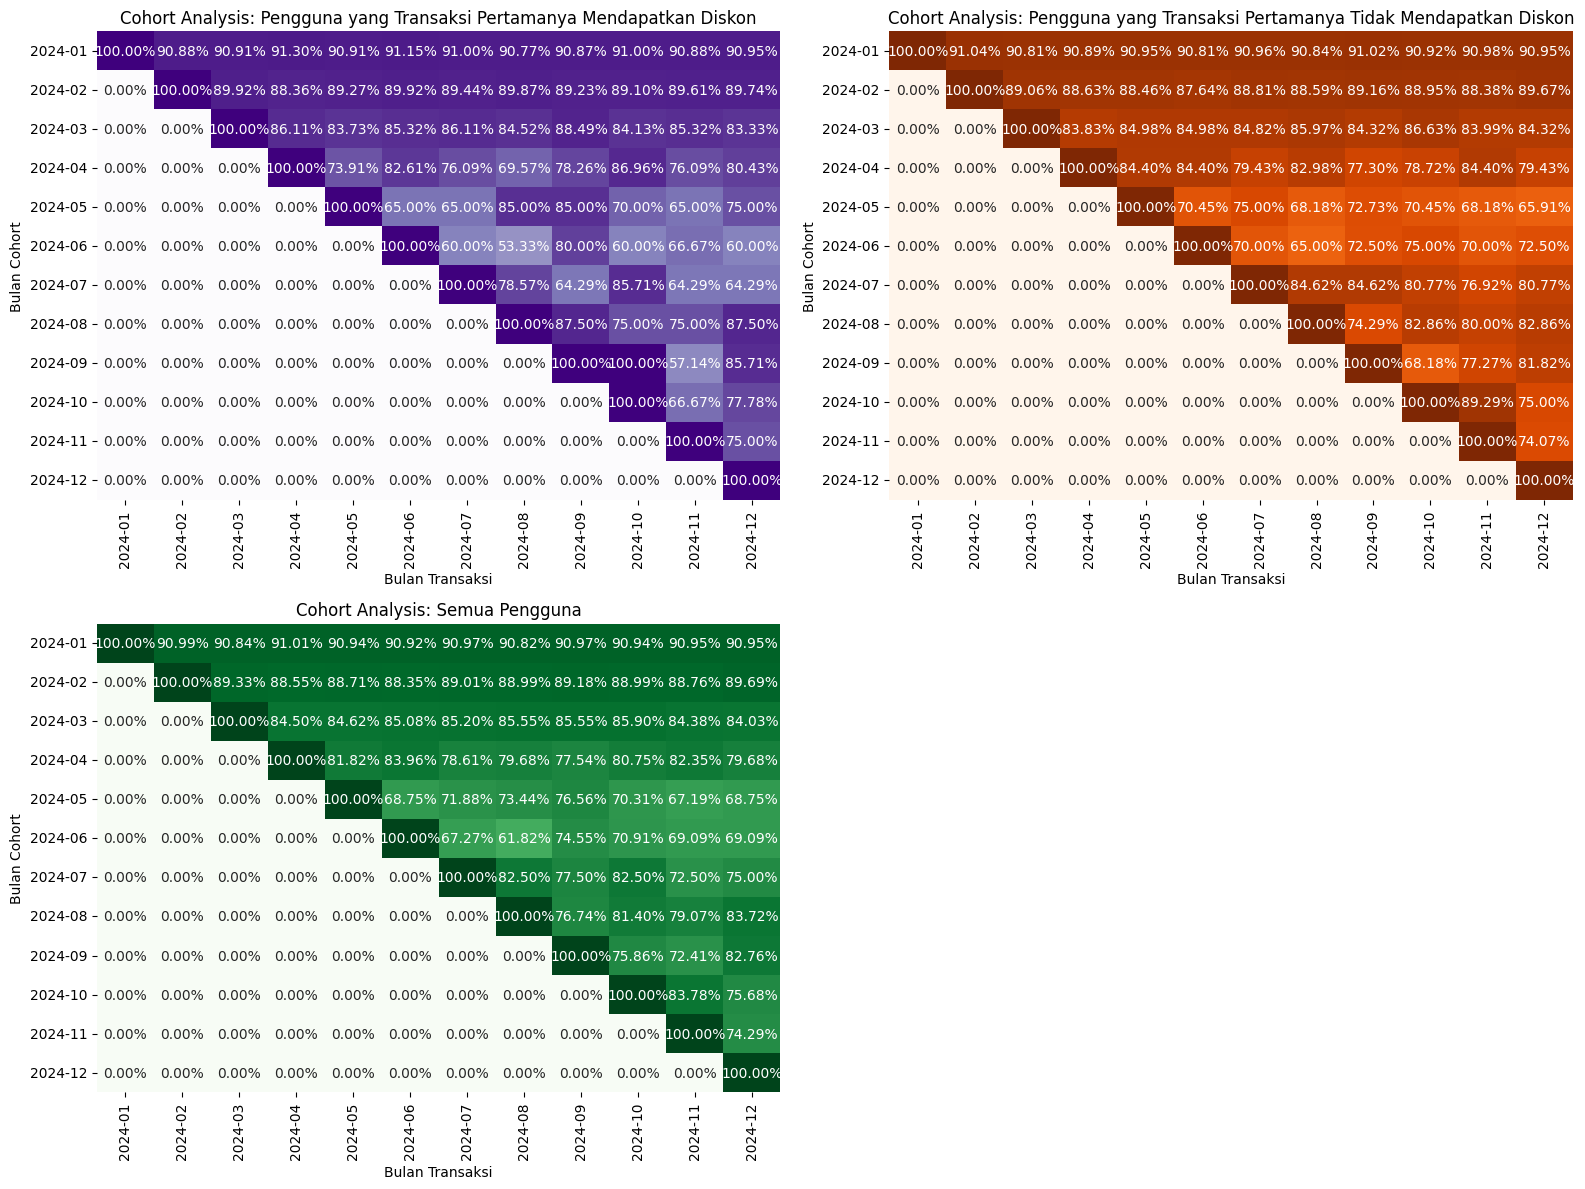

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sortir dataframe berdasarkan user_id dan transaction_date
df_sorted = df_master.sort_values(by=['user_id', 'transaction_date'])

# Identifikasi pengguna berdasarkan apakah transaksi pertamanya mendapatkan diskon atau tidak
first_trx_is_discounted = df_sorted.groupby('user_id').apply(lambda x: x.iloc[0]['discounts'] > 0)

# Filter pengguna yang transaksi pertamanya mendapatkan diskon atau tidak
discounted_first_trx_users = first_trx_is_discounted[first_trx_is_discounted].index
non_discounted_first_trx_users = first_trx_is_discounted[~first_trx_is_discounted].index

# Filter data transaksi untuk pengguna yang transaksi pertamanya mendapatkan diskon atau tidak
discounted_first_transactions = df_master[df_master['user_id'].isin(discounted_first_trx_users)]
non_discounted_first_transactions = df_master[df_master['user_id'].isin(non_discounted_first_trx_users)]

# Hitung cohort index untuk setiap jenis transaksi
cohort_data_first_discounted = calculate_cohort_data(discounted_first_transactions)
cohort_data_first_non_discounted = calculate_cohort_data(non_discounted_first_transactions)
cohort_all = calculate_cohort_data(df_master)

# Normalisasi data cohort untuk setiap jenis transaksi
first_discounted_size, cohort_data_first_discounted_normalized = normalize_cohort_data(cohort_data_first_discounted, discounted_first_transactions)
first_non_discounted_size, cohort_data_first_non_discounted_normalized = normalize_cohort_data(cohort_data_first_non_discounted, non_discounted_first_transactions)
all_size, cohort_all_normalized = normalize_cohort_data(cohort_all, df_master)

# Gabungkan heatmap untuk transaksi pertama dengan diskon, tanpa diskon, atau keseluruhan dalam satu gambar
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.heatmap(cohort_data_first_discounted_normalized, cmap='Purples', annot=True, fmt='.2%', cbar=False)
plt.title('Cohort Analysis: Pengguna yang Transaksi Pertamanya Mendapatkan Diskon')
plt.xlabel('Bulan Transaksi')
plt.ylabel('Bulan Cohort')

plt.subplot(2, 2, 2)
sns.heatmap(cohort_data_first_non_discounted_normalized, cmap='Oranges', annot=True, fmt='.2%', cbar=False)
plt.title('Cohort Analysis: Pengguna yang Transaksi Pertamanya Tidak Mendapatkan Diskon')
plt.xlabel('Bulan Transaksi')
plt.ylabel('Bulan Cohort')

plt.subplot(2, 2, 3)
sns.heatmap(cohort_all_normalized, cmap='Greens', annot=True, fmt='.2%', cbar=False)
plt.title('Cohort Analysis: Semua Pengguna')
plt.xlabel('Bulan Transaksi')
plt.ylabel('Bulan Cohort')

plt.tight_layout()
plt.show()

###**6.1.2 Retensi Pengguna yang Bergabung di Tahun 2024 Berdasarkan Tipe Diskon pada Transaksi Pertamanya**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Filter data hanya untuk pengguna yang join_datenya di tahun 2024
df_master_2024 = df_master[df_master['join_date'].dt.year == 2024]

# Sortir dataframe berdasarkan user_id dan transaction_date
df_sorted = df_master_2024.sort_values(by=['user_id', 'transaction_date'])

# Identifikasi pengguna berdasarkan apakah transaksi pertamanya mendapatkan diskon atau tidak
first_trx_is_discounted = df_sorted.groupby('user_id').apply(lambda x: x.iloc[0]['discounts'] > 0)

# Filter pengguna yang transaksi pertamanya mendapatkan diskon atau tidak
discounted_first_trx_users = first_trx_is_discounted[first_trx_is_discounted].index
non_discounted_first_trx_users = first_trx_is_discounted[~first_trx_is_discounted].index

# Filter data transaksi untuk pengguna yang transaksi pertamanya mendapatkan diskon atau tidak
discounted_first_transactions = df_master[df_master['user_id'].isin(discounted_first_trx_users)]
non_discounted_first_transactions = df_master[df_master['user_id'].isin(non_discounted_first_trx_users)]

# Hitung cohort index untuk setiap jenis transaksi
cohort_data_first_discounted = calculate_cohort_data(discounted_first_transactions)
cohort_data_first_non_discounted = calculate_cohort_data(non_discounted_first_transactions)
cohort_all = calculate_cohort_data(df_master)

# Normalisasi data cohort untuk setiap jenis transaksi
first_discounted_size, cohort_data_first_discounted_normalized = normalize_cohort_data(cohort_data_first_discounted, discounted_first_transactions)
first_non_discounted_size, cohort_data_first_non_discounted_normalized = normalize_cohort_data(cohort_data_first_non_discounted, non_discounted_first_transactions)
all_size, cohort_all_normalized = normalize_cohort_data(cohort_all, df_master)

In [ ]:
df_new_user = pd.DataFrame({'jumlah_user_first_disc': first_discounted_size, 'jumlah_user_first_non_disc': first_non_discounted_size, 'jumlah_user_all': all_size}).reset_index()
df_new_user

# Transform data to long format
df_long = df_new_user.melt(id_vars='cohort', value_vars=['jumlah_user_first_disc', 'jumlah_user_first_non_disc'], var_name='category', value_name='value')

# Rename the categories
df_long['category'] = df_long['category'].replace({
    'jumlah_user_first_disc': 'Diskon',
    'jumlah_user_first_non_disc': 'Non-Diskon'
})

# Create stacked bar chart
fig = px.bar(
    df_long,
    x='cohort',
    y='value',
    color='category',
    text='value',
    title="Proporsi Pengguna Baru 2024 Berdasarkan Tipe Diskon pada Transaksi Pertama",
    labels={'cohort': 'Cohort Month', 'value': 'Banyak Pengguna Baru', 'category': 'Transaksi Pertama Pengguna'}
)

# Show the plot
fig.show()

## **6.2 Jumlah Transaksi Pengguna Per Provinsi berdasarkan Tipe Transaksi Pembelian Pertama Pelanggan**

In [ ]:
# Pastikan kolom transaction_date adalah tipe datetime
df_master['transaction_date'] = pd.to_datetime(df_master['transaction_date'])

# Urutkan berdasarkan user_id dan transaction_date untuk mendapatkan transaksi pertama setiap pengguna
df_master.sort_values(by=['user_id', 'transaction_date'], inplace=True)

# Dapatkan transaksi pertama setiap pengguna
first_transactions = df_master.drop_duplicates(subset=['user_id'], keep='first')

# Tentukan apakah transaksi pertama menggunakan diskon atau tidak
first_transactions['first_transaction_discount'] = first_transactions['discounts'] > 0

# Ubah nilai True/False menjadi "Diskon" dan "Tidak Memakai Diskon"
first_transactions['first_transaction'] = first_transactions['first_transaction_discount'].map({True: 'Diskon', False: 'Non-Diskon'})

# Gabungkan kembali dengan df_master untuk mendapatkan kolom baru
df_master = df_master.merge(first_transactions[['user_id', 'first_transaction']], on='user_id', how='left')

# Menampilkan hasil
display(df_master)

trx_id  product_id  gross_amount  discounts transaction_date  \
0        TRX666512        14.0      305800.0    20000.0       2024-01-01   
1        TRX666514        17.0        5000.0        0.0       2024-01-10   
2        TRX666491         1.0       89800.0    13600.0       2024-01-13   
3        TRX666497         3.0         900.0        0.0       2024-01-21   
4        TRX666493         2.0      124800.0        0.0       2024-01-31   
...            ...         ...           ...        ...              ...   
2735101  TRX562978         4.0       88300.0    40000.0       2024-12-05   
2735102  TRX562971         2.0       42100.0        0.0       2024-12-09   
2735103  TRX562976         4.0       99300.0        0.0       2024-12-16   
2735104  TRX563002        11.0       13200.0        0.0       2024-12-16   
2735105  TRX562985         6.0        6300.0     5700.0       2024-12-30   

                 user_id        full_name     gender  money_spent    refund  \
0        SC1101012001002  PRIASTUTY KAHFI  perempuan    2520000.0   10000.0   
1        SC1101012001002  PRIASTUTY KAHFI  perempuan    2520000.0   10000.0   
2        SC1101012001002  PRIASTUTY KAHFI  perempuan    2520000.0   10000.0   
3        SC1101012001002  PRIASTUTY KAHFI  perempuan    2520000.0   10000.0   
4        SC1101012001002  PRIASTUTY KAHFI  perempuan    2520000.0   10000.0   
...                  ...              ...        ...          ...       ...   
2735101  SC9171051002017           HADLER  laki-laki    2340000.0  390000.0   
2735102  SC9171051002017           HADLER  laki-laki    2340000.0  390000.0   
2735103  SC9171051002017           HADLER  laki-laki    2340000.0  390000.0   
2735104  SC9171051002017           HADLER  laki-laki    2340000.0  390000.0   
2735105  SC9171051002017           HADLER  laki-laki    2340000.0  390000.0   

         ...  nama_kabupaten kode_kabupaten nama_kecamatan kode_kecamatan  \
0        ...    ACEH SELATAN           1101       BAKONGAN         110101   
1        ...    ACEH SELATAN           1101       BAKONGAN         110101   
2        ...    ACEH SELATAN           1101       BAKONGAN         110101   
3        ...    ACEH SELATAN           1101       BAKONGAN         110101   
4        ...    ACEH SELATAN           1101       BAKONGAN         110101   
...      ...             ...            ...            ...            ...   
2735101  ...   KOTA JAYAPURA           9171          HERAM         917105   
2735102  ...   KOTA JAYAPURA           9171          HERAM         917105   
2735103  ...   KOTA JAYAPURA           9171          HERAM         917105   
2735104  ...   KOTA JAYAPURA           9171          HERAM         917105   
2735105  ...   KOTA JAYAPURA           9171          HERAM         917105   

          product_name total_purchase  user_age transaction_month   cohort  \
0            Kesehatan       285800.0        33           2024-01  2024-01   
1                Hotel         5000.0        33           2024-01  2024-01   
2          Man Fashion        76200.0        33           2024-01  2024-01   
3         Food & Drink          900.0        33           2024-01  2024-01   
4        Woman Fashion       124800.0        33           2024-01  2024-01   
...                ...            ...       ...               ...      ...   
2735101   Ride Hailing        48300.0        35           2024-12  2024-01   
2735102  Woman Fashion        42100.0        35           2024-12  2024-01   
2735103   Ride Hailing        99300.0        35           2024-12  2024-01   
2735104    Top Up Game        13200.0        35           2024-12  2024-01   
2735105         Travel          600.0        35           2024-12  2024-01   

        first_transaction  
0                  Diskon  
1                  Diskon  
2                  Diskon  
3                  Diskon  
4                  Diskon  
...                   ...  
2735101        Non-Diskon  
2735102        Non-Diskon  
2735103        Non-Diskon  
2735104 

In [ ]:
import plotly.graph_objects as go

# Hitung jumlah transaksi per provinsi berdasarkan first_transaction
transaction_count_by_province = df_master.groupby(['nama_provinsi', 'first_transaction'])['trx_id'].count().reset_index()

# Buat bar chart
fig = go.Figure()

for first_transaction in transaction_count_by_province['first_transaction'].unique():
    province_data = transaction_count_by_province[transaction_count_by_province['first_transaction'] == first_transaction]
    fig.add_trace(go.Bar(
        x=province_data['nama_provinsi'],
        y=province_data['trx_id'],
        name=first_transaction
    ))

# Atur layout
fig.update_layout(
    title='Jumlah Transaksi Pengguna Per Provinsi Berdasarkan Tipe Transaksi Pembelian Pertama',
    xaxis_title='Provinsi',
    yaxis_title='Jumlah Transaksi',
    legend_title="Transaksi Pertama Pengguna",
    bargap=0.1
)

# Tampilkan plot
fig.show()

##**6.3 Jumlah Penjualan Per Provinsi Berdasarkan Tipe Transaksi Pembelian Pertama Pelanggan**

In [ ]:
import plotly.graph_objects as go

# Hitung total_purchase untuk setiap provinsi berdasarkan first_transaction
total_purchase_by_province = df_master.groupby(['nama_provinsi', 'first_transaction'])['total_purchase'].sum().reset_index()

# Buat bar chart
fig = go.Figure()

for first_transaction in total_purchase_by_province['first_transaction'].unique():
    province_data = total_purchase_by_province[total_purchase_by_province['first_transaction'] == first_transaction]
    fig.add_trace(go.Bar(
        x=province_data['nama_provinsi'],
        y=province_data['total_purchase'],
        name=first_transaction
    ))

# Atur layout
fig.update_layout(
    title='Total Purchase per Provinsi Berdasarkan Tipe Transaksi Pembelian Pertama Pelanggan',
    xaxis_title='Provinsi',
    yaxis_title='Total Purchase',
    legend_title="Transaksi Pertama Pengguna",
    bargap=0.1
)

# Tampilkan plot
fig.show()

## **6.4 Jumlah Transaksi Pelanggan di Tahun 2024 per Provinsi**


In [ ]:
import plotly.graph_objects as go

# Filter data untuk tahun 2024
df_2024 = df_master[pd.DatetimeIndex(df_master['transaction_date']).year == 2024]

# Filter data untuk provinsi-provinsi yang dipilih
selected_provinces = ['JAWA TENGAH', 'ACEH', 'SUMATERA UTARA', 'PAPUA']
df_selected = df_2024[df_2024['nama_provinsi'].isin(selected_provinces)]

# Menghitung jumlah transaksi per bulan per provinsi
transaction_count_by_month_province = df_selected.groupby([pd.DatetimeIndex(df_selected['transaction_date']).month, 'nama_provinsi'])['trx_id'].count().unstack()

import plotly.graph_objects as go

# Membuat dictionary untuk menerjemahkan angka bulan ke nama bulan
month_names = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
               7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}

# Menghitung jumlah transaksi per bulan per provinsi
transaction_count_by_month_province = df_selected.groupby([pd.DatetimeIndex(df_selected['transaction_date']).month, 'nama_provinsi'])['trx_id'].count().unstack()

# Membuat visualisasi line chart
fig = go.Figure()
for col in transaction_count_by_month_province.columns:
    fig.add_trace(go.Scatter(x=[month_names[month] for month in transaction_count_by_month_province.index], y=transaction_count_by_month_province[col], mode='lines', name=col))

fig.update_layout(
    title='Jumlah Transaksi Pelanggan per Provinsi di Tahun 2024',
    xaxis_title='Bulan',
    yaxis_title='Jumlah Transaksi',
    legend_title='Provinsi'
)

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Visualisasi Bar Chart dari jumlah transaksi per bulan
df_master['transaction_month'] = df_master['transaction_date'].dt.month
monthly_transactions = df_master['transaction_month'].value_counts().sort_index()
fig = px.bar(monthly_transactions, x=monthly_transactions.index, y=monthly_transactions.values,
             title='Jumlah Transaksi per Bulan')
fig.show()

Bulan **April**, **November**, dan **Desember** menjadi 3 bulan dengan **jumlah transaksi terbanyak**. Namun, jumlah transaksi yang terjadi per-bulannya tidak jauh berbeda.

##**6.5 Proporsi Frekuensi Pengguna setiap Gender di Provinsi**

### **6.5.1 Proporsi Frekuensi Pengguna setiap Gender di Provinsi Jawa Tengah**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 33
df_filtered = df_master[df_master['kode_provinsi'] == 33]

# Hitung jumlah gender setelah filtering
gender_counts = df_filtered['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Plot donut chart menggunakan Plotly
fig = go.Figure(data=[go.Pie(labels=gender_counts['gender'], values=gender_counts['count'], hole=0.65)])

# Atur warna sesuai gender
colors = ['orange', 'green']
fig.update_traces(marker=dict(colors=colors))

# Tambahkan label gender di dalam donut chart
fig.update_traces(textposition='inside', textinfo='label+percent')

# Tambahkan jumlah gender di tengah donut chart
fig.add_annotation(
    text=f"Total Pengguna<br><b><span style='font-size: 28px;'>{gender_counts['count'].sum()}</span></b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=30)
)

fig.update_layout(
    width=900,
    height=800,
    showlegend=False,
    title=dict(
        text="<b>Proporsi Frekuensi Pengguna Setiap Gender di Provinsi Jawa Tengah</b><br>",
        font=dict(
            size=20,
            color='#757882'
        ),
        y=0.92,
        x=0.50
    )
)

fig.show()

Proporsi frekuensi pengguna setiap gender di provinsi **Jawa Tengah** menunjukkan **perbedaan yang signifikan**. Jumlah pengguna **perempuan lebih dominan** dibandingkan dengan pengguna **laki-laki** dengan perbandingan sebesar **79,9%** dan **20,1%** dari **2.079.583 pengguna**.

###**6.5.2 Proporsi Frekuensi Pengguna setiap Gender di Provinsi Aceh**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 11
df_filtered = df_master[df_master['kode_provinsi'] == 11]

# Hitung jumlah gender setelah filtering
gender_counts = df_filtered['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Plot donut chart menggunakan Plotly
fig = go.Figure(data=[go.Pie(labels=gender_counts['gender'], values=gender_counts['count'], hole=0.65)])

# Atur warna sesuai gender
colors = ['orange', 'green']
fig.update_traces(marker=dict(colors=colors))

# Tambahkan label gender di dalam donut chart
fig.update_traces(textposition='inside', textinfo='label+percent')

# Tambahkan jumlah gender di tengah donut chart
fig.add_annotation(
    text=f"Total Pengguna<br><b><span style='font-size: 28px;'>{gender_counts['count'].sum()}</span></b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=30)
)

fig.update_layout(
    width=900,
    height=800,
    showlegend=False,
    title=dict(
        text="<b>Proporsi Frekuensi Pengguna Setiap Gender di Provinsi Jawa Tengah</b><br>",
        font=dict(
            size=20,
            color='#757882'
        ),
        y=0.92,
        x=0.50
    )
)

fig.show()

Proporsi frekuensi pengguna setiap gender di provinsi **Aceh** menunjukkan **perbedaan yang signifikan**. Jumlah pengguna **perempuan lebih dominan** dibandingkan dengan pengguna **laki-laki** dengan perbandingan sebesar **75,3%** dan **24,7%** dari **248.630 pengguna**.

###**6.5.3 Proporsi Frekuensi Pengguna setiap Gender di Provinsi Sumatera Utara**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 12
df_filtered = df_master[df_master['kode_provinsi'] == 12]

# Hitung jumlah gender setelah filtering
gender_counts = df_filtered['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Plot donut chart menggunakan Plotly
fig = go.Figure(data=[go.Pie(labels=gender_counts['gender'], values=gender_counts['count'], hole=0.65)])

# Atur warna sesuai gender
colors = ['orange', 'green']
fig.update_traces(marker=dict(colors=colors))

# Tambahkan label gender di dalam donut chart
fig.update_traces(textposition='inside', textinfo='label+percent')

# Tambahkan jumlah gender di tengah donut chart
fig.add_annotation(
    text=f"Total Pengguna<br><b><span style='font-size: 28px;'>{gender_counts['count'].sum()}</span></b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=30)
)

fig.update_layout(
    width=900,
    height=800,
    showlegend=False,
    title=dict(
        text="<b>Proporsi Frekuensi Pengguna Setiap Gender di Provinsi Jawa Tengah</b><br>",
        font=dict(
            size=20,
            color='#757882'
        ),
        y=0.92,
        x=0.50
    )
)

fig.show()

Proporsi frekuensi pengguna setiap gender di provinsi **Sumatera Utara** menunjukkan **perbedaan yang signifikan**. Jumlah pengguna **perempuan lebih dominan** dibandingkan dengan pengguna **laki-laki** dengan perbandingan sebesar **78,8%** dan **21,2%** dari **400.855 pengguna**.

###**6.5.4 Proporsi Frekuensi Pengguna setiap Gender di Provinsi Papua**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 91
df_filtered = df_master[df_master['kode_provinsi'] == 91]

# Hitung jumlah gender setelah filtering
gender_counts = df_filtered['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Plot donut chart menggunakan Plotly
fig = go.Figure(data=[go.Pie(labels=gender_counts['gender'], values=gender_counts['count'], hole=0.65)])

# Atur warna sesuai gender
colors = ['orange', 'green']
fig.update_traces(marker=dict(colors=colors))

# Tambahkan label gender di dalam donut chart
fig.update_traces(textposition='inside', textinfo='label+percent')

# Tambahkan jumlah gender di tengah donut chart
fig.add_annotation(
    text=f"Total Pengguna<br><b><span style='font-size: 28px;'>{gender_counts['count'].sum()}</span></b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=30)
)

fig.update_layout(
    width=900,
    height=800,
    showlegend=False,
    title=dict(
        text="<b>Proporsi Frekuensi Pengguna Setiap Gender di Provinsi Jawa Tengah</b><br>",
        font=dict(
            size=20,
            color='#757882'
        ),
        y=0.92,
        x=0.50
    )
)

fig.show()

Proporsi frekuensi pengguna setiap gender di provinsi **Papua** menunjukkan **perbedaan yang tidak terlalu jauh**. Dari data yang dianalisis, terlihat bahwa jumlah pengguna **laki-laki lebih banyak** dibandingkan dengan pengguna **perempuan** dengan perbandingan sebesar **56,2%** dan **43,8%** dari **11.183 pengguna**.

## **6.6 Produk Terlaris di Setiap Provinsi**

### **6.6.1 Produk Terlaris di Provinsi Jawa Tengah**

In [ ]:
import pandas as pd
import plotly.express as px

# Convert 'kode_provinsi' to int
df_master['kode_provinsi'] = df_master['kode_provinsi'].astype(int)

# Filter data berdasarkan kode provinsi 33
df_filtered = df_master[df_master['kode_provinsi'] == 33]

# Ambil 10 produk terlaris dari data yang sudah difilter
top_products = df_filtered['product_name'].value_counts().head(10).reset_index()
top_products.columns = ['product_name', 'jumlah_terjual']  # Ubah nama kolom

# Plot bar chart using Plotly with unique colors for each bar
fig = px.bar(top_products, x='product_name', y='jumlah_terjual',
             title='Produk Terlaris di Provinsi Jawa Tengah',
             labels={'product_name': 'Nama Produk', 'jumlah_terjual': 'Jumlah Terjual'},
             color='product_name')

fig.update_layout(xaxis_tickangle=-45, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()

Food & Drink, Woman Fashion, dan Man Fashion menjadi 3 produk paling laris terjual oleh konsumen di Jawa Tengah.

### **6.6.2 Produk Terlaris di Provinsi Aceh**

In [ ]:
import pandas as pd
import plotly.express as px

# Filter data berdasarkan kode provinsi 11
df_filtered = df_master[df_master['kode_provinsi'] == 11]

# Ambil 10 produk terlaris dari data yang sudah difilter
top_products = df_filtered['product_name'].value_counts().head(10).reset_index()
top_products.columns = ['product_name', 'jumlah_terjual']  # Ubah nama kolom

# Plot bar chart using Plotly with unique colors for each bar
fig = px.bar(top_products, x='product_name', y='jumlah_terjual',
             title='Produk Terlaris di Provinsi Jawa Tengah',
             labels={'product_name': 'Nama Produk', 'jumlah_terjual': 'Jumlah Terjual'},
             color='product_name')

fig.update_layout(xaxis_tickangle=-45, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()

Ride Hailing, Man Fashion, dan Keperluan Rumah Tangga menjadi 3 produk paling laris terjual oleh konsumen di Aceh.

### **6.6.3 Produk Terlaris di Provinsi Sumatera Utara**

In [ ]:
import pandas as pd
import plotly.express as px

# Filter data berdasarkan kode provinsi 12
df_filtered = df_master[df_master['kode_provinsi'] == 12]

# Ambil 10 produk terlaris dari data yang sudah difilter
top_products = df_filtered['product_name'].value_counts().head(10).reset_index()
top_products.columns = ['product_name', 'jumlah_terjual']  # Ubah nama kolom

# Plot bar chart using Plotly with unique colors for each bar
fig = px.bar(top_products, x='product_name', y='jumlah_terjual',
             title='Produk Terlaris di Provinsi Jawa Tengah',
             labels={'product_name': 'Nama Produk', 'jumlah_terjual': 'Jumlah Terjual'},
             color='product_name')

fig.update_layout(xaxis_tickangle=-45, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()

Ride Hailing, Food & Drink, dan Woman Fashion menjadi 3 jenis produk terlaris terjual oleh konsumen di Sumatera Utara.

### **6.6.4 Produk Terlaris di Provinsi Papua**

In [ ]:
import pandas as pd
import plotly.express as px

# Filter data berdasarkan kode provinsi 91
df_filtered = df_master[df_master['kode_provinsi'] == 91]

# Ambil 10 produk terlaris dari data yang sudah difilter
top_products = df_filtered['product_name'].value_counts().head(10).reset_index()
top_products.columns = ['product_name', 'jumlah_terjual']  # Ubah nama kolom

# Plot bar chart using Plotly with unique colors for each bar
fig = px.bar(top_products, x='product_name', y='jumlah_terjual',
             title='Produk Terlaris di Provinsi Jawa Tengah',
             labels={'product_name': 'Nama Produk', 'jumlah_terjual': 'Jumlah Terjual'},
             color='product_name')

fig.update_layout(xaxis_tickangle=-45, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()

Food & Drink, Keperluan Rumah Tangga, dan Ride Hailing menjadi 3 jenis produk terlaris terjual oleh konsumen di Papua.

##**6.7 Jumlah Pengguna Berdasarkan Kategori Usia**

###**6.7.1 Jumlah Pengguna di Provinsi Jawa Tengah Berdasarkan Kategori Usia**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 33
df_filtered = df_master[df_master['kode_provinsi'] == 33]

# Konversi kolom 'transaction_date' dan 'join_date' menjadi tipe data datetime
df_filtered['transaction_date'] = pd.to_datetime(df_filtered['transaction_date'])
df_filtered['join_date'] = pd.to_datetime(df_filtered['join_date'])

# Hitung usia pengguna berdasarkan kolom "birth"
df_filtered['birth'] = pd.to_datetime(df_filtered['birth'])
df_filtered['age'] = (pd.to_datetime('today') - df_filtered['birth']).dt.days // 365

# Definisikan kategori usia
bins = [0, 17, 24, 34, 44, 54, 64, 200]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_filtered['age_category'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah pelanggan unik berdasarkan kategori usia
age_counts = df_filtered.groupby('age_category')['user_id'].nunique().reset_index()
age_counts.columns = ['kategori_usia', 'count']

# Urutkan data berdasarkan kategori usia
age_counts = age_counts.sort_values('kategori_usia')

# Menentukan skema warna
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)']

# Plot bar chart menggunakan Plotly
fig = go.Figure(data=[go.Bar(x=age_counts['kategori_usia'], y=age_counts['count'], marker=dict(color=colors))])

fig.update_layout(
    width=800,
    height=600,
    showlegend=False,
    title=dict(
        text="<b>Jumlah Pelanggan Unik di Provinsi Jawa Tengah Berdasarkan Kategori Usia</b><br>",
        font=dict(
            size=18,
            color='#757882'
        ),
        y=0.92,
        x=0.48
    ),
    xaxis=dict(
        title='Kategori Usia',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Jumlah Pelanggan Unik',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    )
)

fig.show()

**Pelanggan usia dewasa** menjadi **penyumbang pelanggan terbanyak** di provinsi **Jawa Tengah**.

###**6.7.2 Jumlah Pengguna di Provinsi Aceh Berdasarkan Kategori Usia**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 11
df_filtered = df_master[df_master['kode_provinsi'] == 11]

# Konversi kolom 'transaction_date' dan 'join_date' menjadi tipe data datetime
df_filtered['transaction_date'] = pd.to_datetime(df_filtered['transaction_date'])
df_filtered['join_date'] = pd.to_datetime(df_filtered['join_date'])

# Hitung usia pengguna berdasarkan kolom "birth"
df_filtered['birth'] = pd.to_datetime(df_filtered['birth'])
df_filtered['age'] = (pd.to_datetime('today') - df_filtered['birth']).dt.days // 365

# Definisikan kategori usia
bins = [0, 17, 24, 34, 44, 54, 64, 200]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_filtered['age_category'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah pelanggan unik berdasarkan kategori usia
age_counts = df_filtered.groupby('age_category')['user_id'].nunique().reset_index()
age_counts.columns = ['kategori_usia', 'count']

# Urutkan data berdasarkan kategori usia
age_counts = age_counts.sort_values('kategori_usia')

# Menentukan skema warna
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)']

# Plot bar chart menggunakan Plotly
fig = go.Figure(data=[go.Bar(x=age_counts['kategori_usia'], y=age_counts['count'], marker=dict(color=colors))])

fig.update_layout(
    width=800,
    height=600,
    showlegend=False,
    title=dict(
        text="<b>Jumlah Pelanggan Unik di Provinsi Aceh Berdasarkan Kategori Usia</b><br>",
        font=dict(
            size=18,
            color='#757882'
        ),
        y=0.92,
        x=0.48
    ),
    xaxis=dict(
        title='Kategori Usia',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Jumlah Pelanggan Unik',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    )
)

fig.show()

**Pelanggan usia dewasa** menjadi **penyumbang pelanggan terbanyak** di provinsi **Aceh**.

###**6.7.3 Jumlah Pengguna di Provinsi Sumatera Utara Berdasarkan Kategori Usia**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 12
df_filtered = df_master[df_master['kode_provinsi'] == 12]

# Konversi kolom 'transaction_date' dan 'join_date' menjadi tipe data datetime
df_filtered['transaction_date'] = pd.to_datetime(df_filtered['transaction_date'])
df_filtered['join_date'] = pd.to_datetime(df_filtered['join_date'])

# Hitung usia pengguna berdasarkan kolom "birth"
df_filtered['birth'] = pd.to_datetime(df_filtered['birth'])
df_filtered['age'] = (pd.to_datetime('today') - df_filtered['birth']).dt.days // 365

# Definisikan kategori usia
bins = [0, 17, 24, 34, 44, 54, 64, 200]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_filtered['age_category'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah pelanggan unik berdasarkan kategori usia
age_counts = df_filtered.groupby('age_category')['user_id'].nunique().reset_index()
age_counts.columns = ['kategori_usia', 'count']

# Urutkan data berdasarkan kategori usia
age_counts = age_counts.sort_values('kategori_usia')

# Menentukan skema warna
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)']

# Plot bar chart menggunakan Plotly
fig = go.Figure(data=[go.Bar(x=age_counts['kategori_usia'], y=age_counts['count'], marker=dict(color=colors))])

fig.update_layout(
    width=800,
    height=600,
    showlegend=False,
    title=dict(
        text="<b>Jumlah Pelanggan Unik di Provinsi Sumatera Utara Berdasarkan Kategori Usia</b><br>",
        font=dict(
            size=18,
            color='#757882'
        ),
        y=0.92,
        x=0.48
    ),
    xaxis=dict(
        title='Kategori Usia',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Jumlah Pelanggan Unik',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    )
)

fig.show()

**Pelanggan usia dewasa** menjadi **penyumbang pelanggan terbanyak** di provinsi **Sumatera Utara**.

###**6.7.4 Jumlah Pengguna di Provinsi Papua Berdasarkan Kategori Usia**

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data hanya untuk kode provinsi 91
df_filtered = df_master[df_master['kode_provinsi'] == 91]

# Konversi kolom 'transaction_date' dan 'join_date' menjadi tipe data datetime
df_filtered['transaction_date'] = pd.to_datetime(df_filtered['transaction_date'])
df_filtered['join_date'] = pd.to_datetime(df_filtered['join_date'])

# Hitung usia pengguna berdasarkan kolom "birth"
df_filtered['birth'] = pd.to_datetime(df_filtered['birth'])
df_filtered['age'] = (pd.to_datetime('today') - df_filtered['birth']).dt.days // 365

# Definisikan kategori usia
bins = [0, 17, 24, 34, 44, 54, 64, 200]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_filtered['age_category'] = pd.cut(df_filtered['age'], bins=bins, labels=labels, right=False)

# Hitung jumlah pelanggan unik berdasarkan kategori usia
age_counts = df_filtered.groupby('age_category')['user_id'].nunique().reset_index()
age_counts.columns = ['kategori_usia', 'count']

# Urutkan data berdasarkan kategori usia
age_counts = age_counts.sort_values('kategori_usia')

# Menentukan skema warna
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)']

# Plot bar chart menggunakan Plotly
fig = go.Figure(data=[go.Bar(x=age_counts['kategori_usia'], y=age_counts['count'], marker=dict(color=colors))])

fig.update_layout(
    width=800,
    height=600,
    showlegend=False,
    title=dict(
        text="<b>Jumlah Pelanggan Unik di Provinsi Papua Berdasarkan Kategori Usia</b><br>",
        font=dict(
            size=18,
            color='#757882'
        ),
        y=0.92,
        x=0.48
    ),
    xaxis=dict(
        title='Kategori Usia',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title='Jumlah Pelanggan Unik',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    )
)

fig.show()

**Pelanggan usia dewasa** menjadi **penyumbang pelanggan terbanyak** di provinsi **Papua**.

##**6.8 Jumlah Penjualan Pelanggan Per Provinsi**


In [ ]:
import plotly.graph_objects as go

# Membuat dictionary untuk menerjemahkan angka bulan ke nama bulan
month_names = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
               7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}

# Menghitung total pembelian per bulan per provinsi
total_purchase_by_month_province = df_master.groupby([pd.DatetimeIndex(df_master['transaction_date']).month, 'nama_provinsi'])['total_purchase'].sum().unstack()

# Membuat visualisasi line chart
fig = go.Figure()

# Tambahkan trace untuk total pembelian
for col in total_purchase_by_month_province.columns:
    fig.add_trace(go.Scatter(x=[month_names[month] for month in total_purchase_by_month_province.index], y=total_purchase_by_month_province[col], mode='lines', name=col))

fig.update_layout(
    title='Jumlah Penjualan per Provinsi di Tahun 2024',
    xaxis_title='Bulan',
    yaxis_title='Total Purchase',
    legend_title='Provinsi'
)

fig.show()

# **7. Feature Engineering**

## **7.1 Feature Selection**

In [ ]:
# Kolom yang dibutuhkan
list_fitur = ['trx_id', 'user_id', 'transaction_date', 'join_date', 'total_purchase']

# Proses seleksi kolom
df_master_selection = df_master.loc[:, list_fitur]

# Tampilkan datanya
display(df_master_selection)

trx_id          user_id transaction_date  join_date  \
0        TRX679679  SC3304092002002       2024-11-08 2023-11-26   
1        TRX679680  SC3304092002002       2024-04-11 2023-11-26   
2        TRX679681  SC3304092002002       2024-07-01 2023-11-26   
3        TRX679682  SC3304092002002       2024-02-07 2023-11-26   
4        TRX679683  SC3304092002002       2024-03-12 2023-11-26   
...            ...              ...              ...        ...   
2743359        NaN  SC1212202003002              NaT 2023-11-29   
2743360        NaN  SC1212192004002              NaT 2023-12-10   
2743361        NaN  SC1212032006002              NaT 2023-10-02   
2743362        NaN  SC1212222006002              NaT 2023-11-25   
2743363        NaN  SC1212102017001              NaT 2023-12-09   

         total_purchase  
0               24500.0  
1               68800.0  
2                   0.0  
3               27100.0  
4               78300.0  
...                 ...  
2743359             0.0  
2743360             0.0  
2743361             0.0  
2743362             0.0  
2743363             0.0  

[2742378 rows x 5 columns]

In [ ]:
import datetime as dt

# Mengambil data hanya untuk tahun 2024
df_master_2024 = df_master_selection[df_master_selection['transaction_date'].dt.year == 2024]

df_master_2024

trx_id          user_id transaction_date  join_date  \
0        TRX679679  SC3304092002002       2024-11-08 2023-11-26   
1        TRX679680  SC3304092002002       2024-04-11 2023-11-26   
2        TRX679681  SC3304092002002       2024-07-01 2023-11-26   
3        TRX679682  SC3304092002002       2024-02-07 2023-11-26   
4        TRX679683  SC3304092002002       2024-03-12 2023-11-26   
...            ...              ...              ...        ...   
2735101  TRX566727  SC9115142005001       2024-08-17 2023-12-21   
2735102  TRX566728  SC9115142005001       2024-11-17 2023-12-21   
2735103  TRX566729  SC9115142005001       2024-10-19 2023-12-21   
2735104  TRX566730  SC9115142005001       2024-09-13 2023-12-21   
2735105  TRX566731  SC9115142005001       2024-10-03 2023-12-21   

         total_purchase  
0               24500.0  
1               68800.0  
2                   0.0  
3               27100.0  
4               78300.0  
...                 ...  
2735101         53500.0  
2735102         22000.0  
2735103         76300.0  
2735104         71200.0  
2735105         80500.0  

[2735106 rows x 5 columns]

## **7.2 Agregasi**

Melakukan agregasi tabel dengan ketentuan berikut.

* `length` = selisih hari dari tanggal terakhir pengguna bertransaksi ke tanggal pertama kali pengguna bertransaksi. Khusus untuk pengguna yang bergabung pada tahun 2023, tanggal pertama kali bertransaksi dianggap sebagai tanggal join, dan untuk pengguna yang tidak bertransaksi sama sekali di tahun 2024 (tapi pernah bertransaksi di 2023) tanggal terakhir transaksi diasumsikan pada tanggal 2023-12-31.
* `recency` = selisih hari dari tanggal 2025-01-01 ke tanggal terakhir pengguna bertransaksi. Untuk pengguna yang tidak bertransaksi sama sekali di tahun 2024 (tapi pernah bertransaksi di 2023) tanggal terakhir transaksi diasumsikan pada tanggal 2023-12-31.
* `skor_recency` = 1 / (`recency`). Untuk mempermudah analisis.
* `frequency` = jumlah frekuensi transaksi yang dilakukan pengguna.
* `monetary` = jumlah uang yang dikeluarkan pengguna dalam bertransaksi, yaitu sum(total_purchase).
* `money_per_freq` = `monetary` / `frequency`, dapat diartikan sebagai rata-rata uang yang dihabiskan pengguna per transaksi.

In [ ]:
# Agregasi tabel
aggregate = df_master_2024.groupby(['user_id'], as_index=False).agg(
    last_transaction=('transaction_date', 'max'),
    first_transaction=('transaction_date', 'min'),
    join_date=('join_date','first'),
    frequency=('trx_id', 'count'),
    monetary=('total_purchase', 'sum')
)

# Menghitung recency
end_date = dt.datetime(2025, 1, 1)
aggregate['recency'] = (end_date - aggregate['last_transaction']).dt.days

# Menghitung length
condition = aggregate['join_date'] <= pd.Timestamp('2023-12-31')
aggregate['length'] = 0
aggregate.loc[condition, 'length'] = (aggregate.loc[condition, 'last_transaction'] - aggregate.loc[condition, 'join_date']).dt.days
aggregate.loc[~condition, 'length'] = (aggregate.loc[~condition, 'last_transaction'] - aggregate.loc[~condition, 'first_transaction']).dt.days

# Menghitung skor_recency dan money_per_freq
aggregate['skor_recency'] = 1 / aggregate['recency']
aggregate['money_per_freq'] = aggregate['monetary'] / aggregate['frequency']

# Memilih kolom penting
df_master_2024_agg = aggregate[['user_id', 'length', 'recency', 'frequency', 'monetary', 'skor_recency', 'money_per_freq']]
df_master_2024_agg

user_id  length  recency  frequency   monetary  skor_recency  \
0      SC1101012001002     339       42         29  2440000.0      0.023810   
1      SC1101012001003     377       21         25  2461600.0      0.047619   
2      SC1101012002001     425        2         29  2470000.0      0.500000   
3      SC1101012002002     366        2         32  2670000.0      0.500000   
4      SC1101012003001     386       28         28  2080000.0      0.035714   
...                ...     ...      ...        ...        ...           ...   
89309  SC9171032007009     376        6         49  1838400.0      0.166667   
89310  SC9171042001001     380       13         27  1348900.0      0.076923   
89311  SC9171042002002     377        3         35  2150000.0      0.333333   
89312  SC9171051001003     450        8         52  1991000.0      0.125000   
89313  SC9171051002017     365        2         52  2036100.0      0.500000   

       money_per_freq  
0        84137.931034  
1        98464.000000  
2        85172.413793  
3        83437.500000  
4        74285.714286  
...               ...  
89309    37518.367347  
89310    49959.259259  
89311    61428.571429  
89312    38288.461538  
89313    39155.769231  

[89314 rows x 7 columns]

In [ ]:
# Identifikasi user yang tidak bertransaksi di 2024 namun pernah bertransaksi di 2023
df_non_trans_2024 = df_master_selection[df_master_selection['trx_id'].isnull()]

# Hitung length, recency, frequency, monetary, skor_recency, dan money_per_freq untuk user yang tidak bertransaksi di 2024 (Pengguna yang tidak bertransaksi di 2024 diasumsikan bertransaski terakhir kali 2023-12-31)
df_non_trans_2024['length'] = (dt.datetime(2023,12,31) - df_non_trans_2024['join_date']).dt.days
df_non_trans_2024['recency'] = (end_date - dt.datetime(2023,12,31)).days
df_non_trans_2024['frequency'] = 0
df_non_trans_2024['monetary'] = 0
df_non_trans_2024['skor_recency'] = 1 / df_non_trans_2024['recency']
df_non_trans_2024['money_per_freq'] = 0

# Memilih kolom penting
df_non_trans_2024 = df_non_trans_2024[['user_id', 'length', 'recency', 'frequency', 'monetary', 'skor_recency', 'money_per_freq']]
df_non_trans_2024

user_id  length  recency  frequency  monetary  skor_recency  \
2735106  SC9106082021001      52      367          0         0      0.002725   
2735107  SC9106082002001      59      367          0         0      0.002725   
2735108  SC9106012015002      12      367          0         0      0.002725   
2735109  SC9106012011002      86      367          0         0      0.002725   
2735110  SC9106032028001      59      367          0         0      0.002725   
...                  ...     ...      ...        ...       ...           ...   
2743359  SC1212202003002      32      367          0         0      0.002725   
2743360  SC1212192004002      21      367          0         0      0.002725   
2743361  SC1212032006002      90      367          0         0      0.002725   
2743362  SC1212222006002      36      367          0         0      0.002725   
2743363  SC1212102017001      22      367          0         0      0.002725   

         money_per_freq  
2735106               0  
2735107               0  
2735108               0  
2735109               0  
2735110               0  
...                 ...  
2743359               0  
2743360               0  
2743361               0  
2743362               0  
2743363               0  

[7272 rows x 7 columns]

In [ ]:
# Menggabungkan dua DataFrame berdasarkan baris
df_master_agg = pd.concat([df_master_2024_agg, df_non_trans_2024], ignore_index=True)

# Tampilkan hasil
df_master_agg

user_id  length  recency  frequency   monetary  skor_recency  \
0      SC1101012001002     339       42         29  2440000.0      0.023810   
1      SC1101012001003     377       21         25  2461600.0      0.047619   
2      SC1101012002001     425        2         29  2470000.0      0.500000   
3      SC1101012002002     366        2         32  2670000.0      0.500000   
4      SC1101012003001     386       28         28  2080000.0      0.035714   
...                ...     ...      ...        ...        ...           ...   
96581  SC1212202003002      32      367          0        0.0      0.002725   
96582  SC1212192004002      21      367          0        0.0      0.002725   
96583  SC1212032006002      90      367          0        0.0      0.002725   
96584  SC1212222006002      36      367          0        0.0      0.002725   
96585  SC1212102017001      22      367          0        0.0      0.002725   

       money_per_freq  
0        84137.931034  
1        98464.000000  
2        85172.413793  
3        83437.500000  
4        74285.714286  
...               ...  
96581        0.000000  
96582        0.000000  
96583        0.000000  
96584        0.000000  
96585        0.000000  

[96586 rows x 7 columns]

Variabel `length`, `skor_recency`, dan `money_per_freq` akan digunakan dalam proses analisis dengan pertimbangan efisiensi algoritma modeling dan kemudahan visualisasi hasil model (3D).

Selanjutnya, membuat fitur kategori untuk variabel `length`, `skor_recency`, dan `money_per_freq` dengan nilai berupa bilangan bulat 1 - 5 untuk memudahkan proses segmentasi. Urutan nilai mewakili peringkat ketiga variabel tersebut (1 terendah dan 5 tertinggi).

In [ ]:
import pandas as pd
import numpy as np

def categorize_column(df, column_name):
    # Identifikasi outlier menggunakan IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Buat dataframe untuk upper outlier, lower outlier, dan non outlier
    df_upper = df.copy()[df[column_name] > upper_bound]
    df_lower = df.copy()[df[column_name] < lower_bound]
    df_non_outliers = df.copy()[(df[column_name] <= upper_bound) & (df[column_name] >= lower_bound)]

    # Tentukan kategori untuk upper dan lower outlier
    category_col = f'category_{column_name}'
    df_upper[category_col] = 5
    df_lower[category_col] = 1

    # Bagi nilai yang tidak termasuk outlier menjadi 5 interval
    non_outliers = df_non_outliers[column_name]
    bins = np.linspace(non_outliers.min(), non_outliers.max(), 6)
    labels = [1, 2, 3, 4, 5] # Labels for non-outliers

    # Berikan kategori untuk nilai non-outlier
    df_non_outliers[category_col] = pd.cut(non_outliers, bins=bins, labels=labels, include_lowest=True)

    # Gabungkan semua dataframe menjadi satu
    df = pd.concat([df_upper, df_lower, df_non_outliers], ignore_index=True)

    return df

# Simpan hasil pemanggilan fungsi dalam dataframe baru
df_cat = df_master_agg.copy()
df_cat = categorize_column(df_cat, 'length')
df_cat = categorize_column(df_cat, 'skor_recency')
df_cat = categorize_column(df_cat, 'money_per_freq')
df_cat

user_id  length  recency  frequency   monetary  skor_recency  \
0      SC1102152001001     199        1         14  1982900.0      1.000000   
1      SC1205011001004      82        1          2   421900.0      1.000000   
2      SC1101162007002     380        1         26  2402000.0      1.000000   
3      SC1102042013001     395        1         25  2210000.0      1.000000   
4      SC1102072015002     375        1         24  2120000.0      1.000000   
...                ...     ...      ...        ...        ...           ...   
96581  SC9171032007009     376        6         49  1838400.0      0.166667   
96582  SC9171042001001     380       13         27  1348900.0      0.076923   
96583  SC9171042002002     377        3         35  2150000.0      0.333333   
96584  SC9171051001003     450        8         52  1991000.0      0.125000   
96585  SC9171051002017     365        2         52  2036100.0      0.500000   

       money_per_freq  category_length  category_skor_recency  \
0       141635.714286                1                      5   
1       210950.000000                1                      5   
2        92384.615385                3                      5   
3        88400.000000                4                      5   
4        88333.333333                3                      5   
...               ...              ...                    ...   
96581    37518.367347                3                      2   
96582    49959.259259                3                      1   
96583    61428.571429                3                      4   
96584    38288.461538                5                      2   
96585    39155.769231                3                      5   

       category_money_per_freq  
0                            5  
1                            5  
2                            5  
3                            5  
4                            5  
...                        ...  
96581                        2  
96582                        3  
96583                        4  
96584                        2  
96585                        3  

[96586 rows x 10 columns]

In [ ]:
# Simpan hasil kategori variabel clustering dalam df_master_agg
df_cat = df_cat[['user_id','category_length','category_skor_recency','category_money_per_freq']]
df_master_agg = df_master_agg.merge(df_cat, on='user_id')

# Tampilkan
df_master_agg

user_id  length  recency  frequency   monetary  skor_recency  \
0      SC1101012001002     339       42         29  2440000.0      0.023810   
1      SC1101012001003     377       21         25  2461600.0      0.047619   
2      SC1101012002001     425        2         29  2470000.0      0.500000   
3      SC1101012002002     366        2         32  2670000.0      0.500000   
4      SC1101012003001     386       28         28  2080000.0      0.035714   
...                ...     ...      ...        ...        ...           ...   
96581  SC1212202003002      32      367          0        0.0      0.002725   
96582  SC1212192004002      21      367          0        0.0      0.002725   
96583  SC1212032006002      90      367          0        0.0      0.002725   
96584  SC1212222006002      36      367          0        0.0      0.002725   
96585  SC1212102017001      22      367          0        0.0      0.002725   

       money_per_freq  category_length  category_skor_recency  \
0        84137.931034                2                      1   
1        98464.000000                3                      1   
2        85172.413793                5                      5   
3        83437.500000                3                      5   
4        74285.714286                3                      1   
...               ...              ...                    ...   
96581        0.000000                1                      1   
96582        0.000000                1                      1   
96583        0.000000                1                      1   
96584        0.000000                1                      1   
96585        0.000000                1                      1   

       category_money_per_freq  
0                            5  
1                            5  
2                            5  
3                            5  
4                            5  
...                        ...  
96581                        1  
96582                        1  
96583                        1  
96584                        1  
96585                        1  

[96586 rows x 10 columns]

## **7.3 Feature Scaling**

Akan dilakukan normalisasi pada variabel `length`, `skor_recency`, dan `money_per_freq` menggunakan metode **Min-Max Scaler** dengan alasan berikut.
* MinMaxScaler mentransformasi nilai ke dalam rentang 0 dan 1 sehingga algoritma clustering tidak terpengaruh oleh perbedaan skala yang signifikan. Nilai tersebut mudah diinterpretasikan sehingga membantu memahami hasil clustering dan mengidentifikasi pola dalam data.
* MinMaxScaler tidak mengubah distribusi data sehingga outlier tetap terjaga dalam dataset karena pada analisis clustering, outlier dapat memberikan informasi penting tentang pola dan perilaku data yang tidak biasa.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform(
    df_master_agg[['length','skor_recency','money_per_freq']]
)

df_normalized = pd.DataFrame(
    scaled,
    columns=['length_norm','skor_recency_norm','money_per_freq_norm']
)

df = pd.concat([df_master_agg, df_normalized], axis=1)
df

user_id  length  recency  frequency   monetary  skor_recency  \
0      SC1101012001002     339       42         29  2440000.0      0.023810   
1      SC1101012001003     377       21         25  2461600.0      0.047619   
2      SC1101012002001     425        2         29  2470000.0      0.500000   
3      SC1101012002002     366        2         32  2670000.0      0.500000   
4      SC1101012003001     386       28         28  2080000.0      0.035714   
...                ...     ...      ...        ...        ...           ...   
96581  SC1212202003002      32      367          0        0.0      0.002725   
96582  SC1212192004002      21      367          0        0.0      0.002725   
96583  SC1212032006002      90      367          0        0.0      0.002725   
96584  SC1212222006002      36      367          0        0.0      0.002725   
96585  SC1212102017001      22      367          0        0.0      0.002725   

       money_per_freq  category_length  category_skor_recency  \
0        84137.931034                2                      1   
1        98464.000000                3                      1   
2        85172.413793                5                      5   
3        83437.500000                3                      5   
4        74285.714286                3                      1   
...               ...              ...                    ...   
96581        0.000000                1                      1   
96582        0.000000                1                      1   
96583        0.000000                1                      1   
96584        0.000000                1                      1   
96585        0.000000                1                      1   

       category_money_per_freq  length_norm  skor_recency_norm  \
0                            5     0.741794           0.021142   
1                            5     0.824945           0.045017   
2                            5     0.929978           0.498634   
3                            5     0.800875           0.498634   
4                            5     0.844639           0.033080   
...                        ...          ...                ...   
96581                        1     0.070022           0.000000   
96582                        1     0.045952           0.000000   
96583                        1     0.196937           0.000000   
96584                        1     0.078775           0.000000   
96585                        1     0.048140           0.000000   

       money_per_freq_norm  
0                 0.061191  
1                 0.071610  
2                 0.061944  
3                 0.060682  
4                 0.054026  
...                    ...  
96581             0.000000  
96582             0.000000  
96583             0.000000  
96584             0.000000  
96585             0.000000  

[96586 rows x 13 columns]

In [ ]:
df.to_csv('df_master_agg.csv', index=False)

# **8. EDA setelah FE**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/rahmadkholid/DatAvengers/main/df_master_agg.csv'
df_master_agg = pd.read_csv(url)

In [ ]:
df_master_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96586 entries, 0 to 96585
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  96586 non-null  object 
 1   length                   96586 non-null  int64  
 2   recency                  96586 non-null  int64  
 3   frequency                96586 non-null  int64  
 4   monetary                 96586 non-null  float64
 5   skor_recency             96586 non-null  float64
 6   money_per_freq           96586 non-null  float64
 7   category_length          96586 non-null  int64  
 8   category_skor_recency    96586 non-null  int64  
 9   category_money_per_freq  96586 non-null  int64  
 10  length_norm              96586 non-null  float64
 11  skor_recency_norm        96586 non-null  float64
 12  money_per_freq_norm      96586 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 9.6+ MB


## **8.1 Korelasi antar Variabel Numerik**

In [ ]:
#Pilih data numerik
data_num = df_master_agg[['length','recency', 'frequency', 'monetary','skor_recency','money_per_freq']]

#Cari korelasi
data_corr = data_num.corr()

data_corr

length   recency  frequency  monetary  skor_recency  \
length          1.000000 -0.949605   0.755039  0.704314      0.273005   
recency        -0.949605  1.000000  -0.776113 -0.724881     -0.286431   
frequency       0.755039 -0.776113   1.000000  0.642888      0.249045   
monetary        0.704314 -0.724881   0.642888  1.000000      0.175680   
skor_recency    0.273005 -0.286431   0.249045  0.175680      1.000000   
money_per_freq  0.434334 -0.461455   0.087441  0.627945      0.048293   

                money_per_freq  
length                0.434334  
recency              -0.461455  
frequency             0.087441  
monetary              0.627945  
skor_recency          0.048293  
money_per_freq        1.000000

In [ ]:
import plotly.express as px
fig = px.imshow(data_corr, color_continuous_scale='blues', title = '<b>Korelasi Kolom Numerik<b>', text_auto=True)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(title=dict(x=0.5, y=0.9, xanchor='center', yanchor='top'))

#Menampilkan heatmap
fig.show()

## **8.2 Memeriksa Outlier pada Variabel LRFM yang dimodifikasi**

In [ ]:
# Membuat fungsi untuk memeriksa outlier
def check_outliers(columns):
    # Menginisialisasi dictionary untuk menyimpan informasi outlier
    outliers = {}

    # Memeriksa outlier pada kolom numerik
    for column in columns:
        # Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
        q1 = df_master_agg[column].quantile(0.25)
        q3 = df_master_agg[column].quantile(0.75)

        # Menghitung rentang antar kuartil (IQR)
        iqr = q3 - q1

        # Menghitung batas bawah dan batas atas untuk outlier
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Memeriksa apakah ada outlier dalam kolom
        is_outlier = (df_master_agg[column] < lower_bound) | (df_master_agg[column] > upper_bound)

        # Menyimpan informasi outlier ke dalam dictionary
        outliers[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'count': is_outlier.sum()
        }

    # Mengembalikan dictionary dengan informasi outlier
    return outliers

In [ ]:
# Memeriksa outlier dengan fungsi
columns_to_check = ['length','skor_recency','money_per_freq']
outliers = check_outliers(columns_to_check)

# Menampilkan informasi outlier
print("Jumlah outlier di kolom:")
for column,i in outliers.items():
    print(column)
    print("Batas bawah:", i['lower_bound'])
    print("Batas atas:", i['upper_bound'])
    print("Jumlah outlier:", i['count'])
    print()

Jumlah outlier di kolom:
length
Batas bawah: 295.0
Batas atas: 495.0
Jumlah outlier: 7749

skor_recency
Batas bawah: -0.26136363636363646
Batas atas: 0.5568181818181819
Jumlah outlier: 7156

money_per_freq
Batas bawah: 6618.316588488833
Batas atas: 86383.49534102435
Jumlah outlier: 10708



## **8.3 Visualisasi 3 Dimensi Recency, Frequency, dan Monetery tiap Pengguna**

In [ ]:
import plotly.graph_objects as go

# Buat scatter plot tiga dimensi
fig = go.Figure(data=[go.Scatter3d(
    x=df_master_agg['recency_normalize'],
    y=df_master_agg['frequency_normalize'],
    z=df_master_agg['monetary_normalize'],
    mode='markers'
)])

# Atur label sumbu
fig.update_layout(scene=dict(
    xaxis_title='Recency',
    yaxis_title='Frequency',
    zaxis_title='Monetary'
))

# Tampilkan plot
fig.show()